In [1]:
import pandas as pd
from itertools import zip_longest
from IPython.display import HTML as html_print
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import re

In [5]:
test = pd.read_csv('viral_fp_new/datasets/test.csv')
test

FileNotFoundError: [Errno 2] No such file or directory: 'viral_fp_new/datasets/test.csv'

In [3]:
# run https://dtu.biolib.com/DeepTMHMM on 2022/12/29
tmd = {'192':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
       '265': 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
       '105':'SSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIII',
       '618':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIII',
       '574':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
       '158':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMIMMMMMMMMMMOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMIIIIIIIIIMMMMMMMMMMMMMMMMMMMMMOOOOMMMMMMMMMMMMMMI',
      '146':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMIIIIIIIIMMMMMMMMMMMMMMMMMMMMMOOOOMMMMMMMMMMMMMMMI',
       '225':'SSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII',
      '779':'SSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIII',
      '804':'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOMMMMMMMMMMMMMMMMMMMMMIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII'
      }

In [4]:
   
# get html element
def cstr(s, bold, color='black'):
    if s == ' ':
        return "<text style=color:#000;padding-left:10px;background-color:{}> </text>".format(color, s)
    else:
        if bold == 'b':
            return "<text style=color:#000;background-color:{}> <b><u>{}</u></b> </text>".format(color, s)
#         if tmd == 't':
#             return "<text style=color:#000;background-color:{}> <b><u>{}</u></b> </text>".format(color, s)
        else:
            return "<text style=color:#000;background-color:{}>{} </text>".format(color, s)

    #             return "<text style=color:#000;padding-left:10px;background-color:{}> <{}> </text> </{}>".format(bold,color,s,bold)
#             return "<text style=color:#000;background-color:{}>{} <{}> </text> </{}>".format(color,s,bold,bold) 

# print html
def print_color(t, bold_letter):
#     for i in range(len(t)):
#         ti = t[i][0]
#         ci = t[i][1]
#         bi = bold_letter[i][1]
    display(html_print(''.join([cstr(t[i][0],bold_letter[i][1], color=t[i][1]) for i in range(len(t))])))
#     display(html_print(''.join([cstr(ti, color=ci, bi) for ti,ci in t])))
#     display(html_print(''.join([bold(ti, bi) for ti,bi in bold_letter])))

# get appropriate color for value
def get_clr(value):
    cmap = cm.get_cmap('YlOrRd')  
    rgba = cmap(value)
    # rgb2hex accepts rgb or rgba
    col = matplotlib.colors.rgb2hex(rgba)
    return col
    
#check if this is ok
window = 21
def get_scores_seq(seq,file_predict, mode='max'):

    list_scores=[]

    
    #for each subseq
    for i in range(len(seq)-1):
        posi = i
        posf = posi+window #window_size
        
#         score = round(float(new_df['class predicted'][i]),4)
        
        if len(file_predict.columns)>2: # tem proba
#             score_0 = round(float(new_df['prob_class_0'][i]),4)   
#             score_1 = round(float(new_df['prob_class_1'][i]),4)
            score_column = 'prob_class_1'
        else:
            score_column = 'class predicted'
            
        # try put all the values in a list of the scores . each letter has a list of values of the scores in which that letter appear
        if i+window < len(file_predict):
            val = file_predict[score_column][i:posf]
        elif i >= len(file_predict):
            val = [file_predict[score_column][file_predict.shape[0]-1]]
        else: 
            val = file_predict[score_column][i:]
            
        if mode == 'max':
            new_val = max(val) # np.mean
        elif mode == 'mean':
            new_val = np.mean(val)
        list_scores.append(round(float(new_val),4))
    return list_scores


def graphic(new_score):
    plt.plot(new_score)
    plt.show()
    

def visualize(file_predict, seq, location, mode): 
    new_score = get_scores_seq(seq,file_predict,mode)

    graphic(new_score)
    text_colours = []
    bold_letter = []
    for i in range(len(seq)-2):
        text = (seq[i], get_clr(new_score[i]))
        text_colours.append(text)
        
        if type(location) == list: 
            # '[(85, 93), (129, 136)]'' : # bipartid
            if i in range(location[0][0], location[0][1]-1):
              bold_letter.append((seq[i],'b'))
            elif i in range(location[1][0], location[1][1]-1):
              bold_letter.append((seq[i],'b'))      
            else:
              bold_letter.append((seq[i],np.nan))
                    
        else: # all the others peptides
            if i in range(location[0], location[1]-1):
                bold_letter.append((seq[i],'b'))
            else:
                bold_letter.append((seq[i],np.nan))
    
    # location in bold or box around 
    print_color(text_colours, bold_letter)

def visualize_tmd(tmd_str, sequence_fusogenic):
    score_list = []
    bold_letter = []
    text_colours = []
    tmd = []
    signal= []
    for i in range(len(tmd_str)):   #'OSMI'
        ch = tmd_str[i]
        aa = sequence_fusogenic[i]


        if ch == 'M':
            membrane = 0.9
            tmd.append(aa)
        elif ch == 'S':
            # its a signal !!!!! just to not change the color 
            membrane = 0.5 # just a number to get colour
            signal.append(aa)
        else:
            membrane = 0

        text = (aa, get_clr(membrane))
        text_colours.append(text)
        bold_letter.append('none')
        score_list.append(membrane)
        
    print_color(text_colours, bold_letter)
    print('tmd', str(tmd))
    print('signal', str(signal))
        

In [5]:

path_results = '/home/martinha/PycharmProjects/viral_fp/viral_fp_new/src/classify_segments/results/'

def output(model_name_specific):
    for idProtein in test['idProtein']: 
        print('################################')
        print(idProtein)

        file_predict = pd.read_csv(path_results+model_name_specific + '/TESTSEQ{}.csv'.format(idProtein))

        test_id = test.loc[test['idProtein'] == idProtein]

        true_subseq = str(test_id['seq_vfp'].values[0])
        fusogenic = str(test_id['Sequence_fusogenic'].values[0])

        print(test_id['Name'].values[0])

        tmd_predict = tmd[str(idProtein)]    

        # index of true vfp
        print(true_subseq)
        if idProtein == 779: # éo bipartido
            true_subseq1 = 'FRWYGPKY'
            true_subseq2 = 'CGYATVT'
            index_of_vfp1 =  fusogenic.index(true_subseq1)
            index_of_vfp2 =  fusogenic.index(true_subseq2)
            location_of_vfp1 = (index_of_vfp1, index_of_vfp1 + len(true_subseq1))
            location_of_vfp2 = (index_of_vfp2, index_of_vfp2 + len(true_subseq2))
            location_of_vfp = [location_of_vfp1, location_of_vfp2]

        else:
        
            index_of_vfp =  fusogenic.index(true_subseq)
            location_of_vfp = (index_of_vfp, index_of_vfp + len(true_subseq))
        
        
        print('vfp model prediction')
        # plot the vfp model predictions 

        mode = 'max' # or 'mean'   value of each letter . 
        #the score although is by position represents the score for that position + 21. decide how to score each position.  

        visualize(file_predict, seq = fusogenic, location = location_of_vfp, mode=mode)

        print('tmd prediction by DeepTMHMM')
        visualize_tmd(tmd_predict,fusogenic)


        # ### relevant info 
        score_of_true_vfp = file_predict.loc[index_of_vfp]['class predicted']
        print('vfp predicted:', score_of_true_vfp )
        if len(file_predict.columns)>2 : # tem proba
            score_of_true_vfp_0 = file_predict.loc[index_of_vfp]['prob_class_0']
            score_of_true_vfp_1 = file_predict.loc[index_of_vfp]['prob_class_1']
            print('score vfp predicted:', score_of_true_vfp_1)
            df_sorted = file_predict.sort_values(by='prob_class_1', ascending=False)
            print('\n max score predicted')
            print('\n top scores')
            print(df_sorted[:5])

        print('index of true', index_of_vfp)
    #     print(file_predict.loc[file_predict['class predicted']==1])




In [6]:
# model_name_specific = 'Half_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf' # bastante bom ver! 
# model_name_specific = 'Half_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc'
# model_name_specific = 'half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_gboosting'  # ver 
# model_name_specific = 'half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_rf'  # ver
# model_name_specific = 'half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc'  #  fraco


# model_name_specific = 'all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf_weights' # pessimo
# model_name_specific = 'all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gboosting'   # pessimo
# model_name_specific = 'all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc_prob_weights' # acerta alguns.
# model_name_specific = 'All_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc'
# model_name_specific = 'All_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf'
# model_name_specific = 'all_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc'
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_gboosting' # acerta 2


# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gboosting'  # fraco acerta alguns  
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_lr'  # acerta alguns F N G L T V L P P L L T D E M I A Q Y T S A L L A 
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gnb' # fraco acerta alguns  
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_sgd' # fraco 
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf' # scores mt baixos 
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc' # acerta alguns. outros n dá nada. 0 e 1 (n tem prob) 
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_linear_svc' # metade preve bem 
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_knn' # horrivel

# model_name_specific = 'third_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc'
# model_name_specific = 'third_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_rf'


# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # deu sempre as primeiras sequencias
# model_name_specific = 'dl/third_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # dá tudo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # pessimo. tb dá tudo

# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2' # pessimo. tb dá tudo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2_cwei' #pessimo
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2_cwei' #pessimo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_att_bayesian_cwei'
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cwei' # melhor mas horrivel na mesma 

# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cwei' # melhor mas horrivel na mesma 
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV2' #  melhor mas pessimo
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV3'
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV4'
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV3'




# WE method in each protein gets 100 dim
 
model_name_specific = 'all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc'  #  fiz overwrite sem querer. é WEmetod3 recorrer
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf' # mau    # fiz overwrite sem querer. é WEmetod3 recorrer
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gboosting' # mau
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn' # ver este
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # há piores

model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf'
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # mau 
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn'  
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # há piores

model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf'
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # mau
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # mau
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn' # mau



# method 1 19*100
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # prevÊ 3 xb   FEZ OVERWRITE DOS DE CIMA
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf'
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # há piores
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_knn' # mau


model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf' # mau
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_svc' # pessimo
model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # mau


model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf' # mau
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_svc' # pessimo
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # ver


model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm1' # nao é mau 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm2' # nao é mau ver 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm3' # nao é mau ver 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm4' # nao é mau ver 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm5' #  ver 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm6' # nao é mau ver



# transformers fine tune and predict (no model no hyper changed)
# the smallest
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80' # mau 
model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80' # melhor mas mau na mesma 
model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80'

model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook/esm2_t12_35M_UR50D_finetune_class_10groupedKFOLD_cluster80' # preve mt coisa
model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_esm2_t36_3B_UR50D_finetune_class_10groupedKFOLD_cluster80' # preve mt coisa
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook/esm2_t12_35M_UR50D_finetune_class_10groupedKFOLD_cluster80'# prevê 4


# get the representations nad feed to a model ãfinal é pretrained.esm2_t33_650M_UR50D    (esqueci me de mudar a string)
model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve 4 
model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau
model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau


# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # acerta quase todos mas tb outros 
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau no geral 
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb'

# model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # mau. preve mt coisa
# model_name_specific ='ml/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau pior q third
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau mas ja vi pior 


# # o pequeno 
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve 6
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # pessimo
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau

# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve mt coisa0
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # 

# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve mt coisa0
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau



# transformer pequeno ES2bT68M + LSTM

# seq representations
model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # mau 
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo
model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo

# contactrepresentations
model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # literalmente a seq toda ahah
model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # did not run CV scores
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # did not run CV scores



# transformer maior  ES2bT33 + LSTM    So experimentei uma. pode n ser a melhor

model_name_specific =  'dl/half_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo 
model_name_specific =  'dl/third_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo 
# model_name_specific =  'dl/all_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo 


# output(model_name_specific)

In [7]:
# os scores tÊm de avancar para a frente 
# score do vfp quando tem mais q 21 aa 
# get the vfp predicted (more correctly) 



# Physicochemical Machine learning 


################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


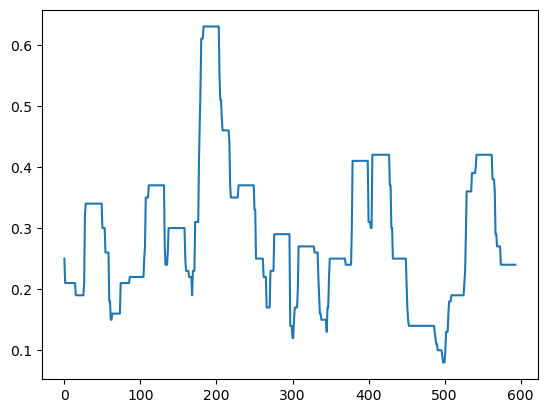

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 1.0
score vfp predicted: 0.55

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
203         203                1          0.37          0.63
200         200                1          0.39          0.61
201         201                1          0.39          0.61
202         202                1          0.44          0.56
204         204                1          0.45          0.55
index of true 204
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


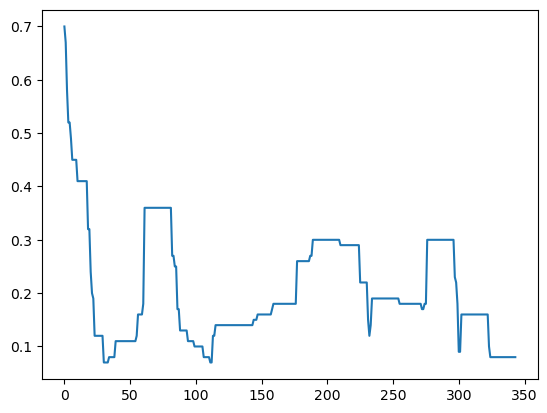

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.7

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1          0.30          0.70
1           1                1          0.33          0.67
2           2                1          0.42          0.58
4           4                1          0.48          0.52
3           3                0          0.51          0.49
index of true 0
################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


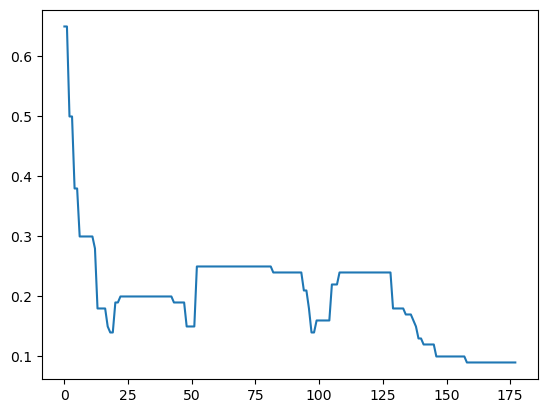

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1.0
score vfp predicted: 0.65

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
1           1                1          0.35          0.65
0           0                1          0.36          0.64
3           3                0          0.50          0.50
2           2                0          0.51          0.49
5           5                0          0.62          0.38
index of true 1
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


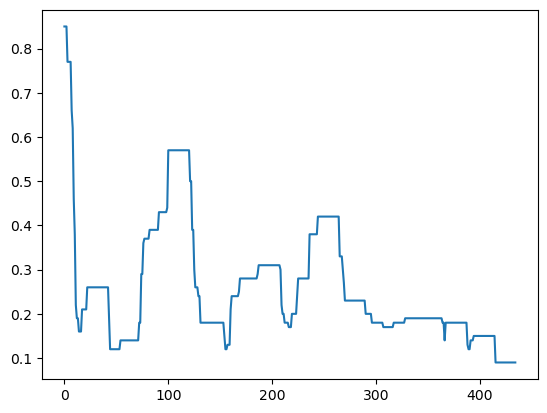

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 0.8

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
2           2                1          0.15          0.85
0           0                1          0.20          0.80
1           1                1          0.20          0.80
6           6                1          0.23          0.77
3           3                1          0.24          0.76
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


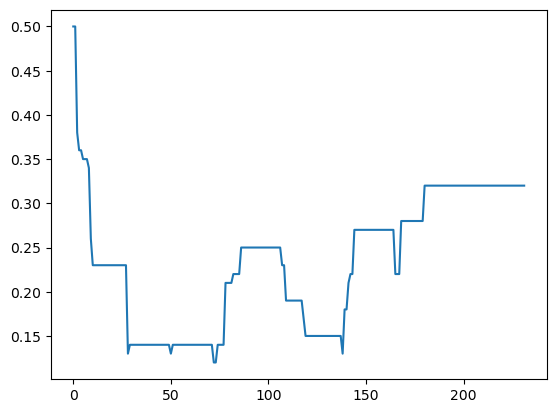

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0.0
score vfp predicted: 0.43

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
1           1                0          0.50          0.50
0           0                0          0.57          0.43
2           2                0          0.62          0.38
4           4                0          0.64          0.36
7           7                0          0.65          0.35
index of true 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


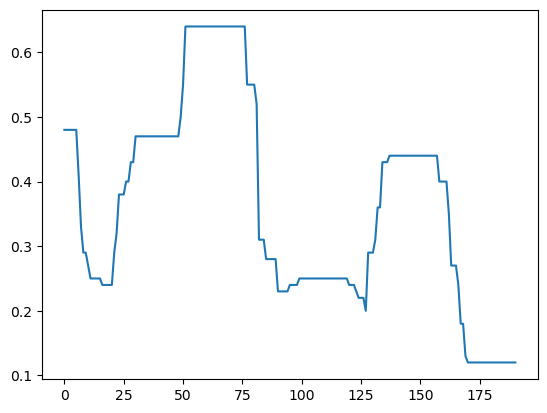

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 0.63

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
76          76                1          0.36          0.64
71          71                1          0.36          0.64
73          73                1          0.37          0.63
74          74                1          0.37          0.63
72          72                1          0.38          0.62
index of true 73
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


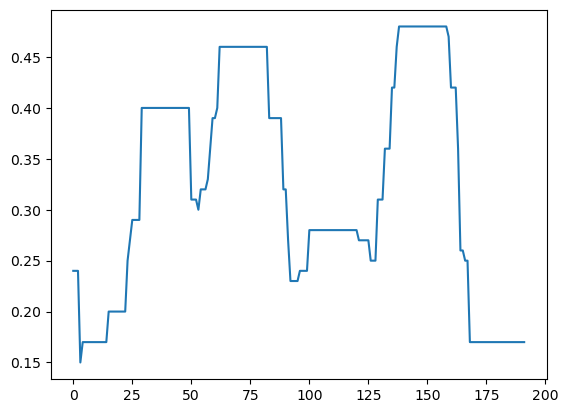

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0.0
score vfp predicted: 0.32

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
158         158                0          0.52          0.48
159         159                0          0.53          0.47
157         157                0          0.54          0.46
82           82                0          0.54          0.46
155         155                0          0.58          0.42
index of true 74
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


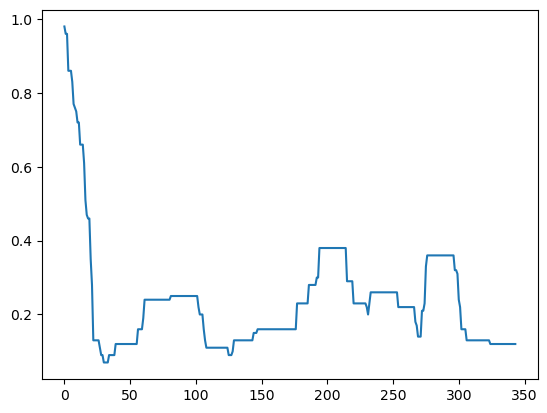

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 0.98

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1          0.02          0.98
2           2                1          0.04          0.96
1           1                1          0.04          0.96
5           5                1          0.14          0.86
3           3                1          0.15          0.85
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


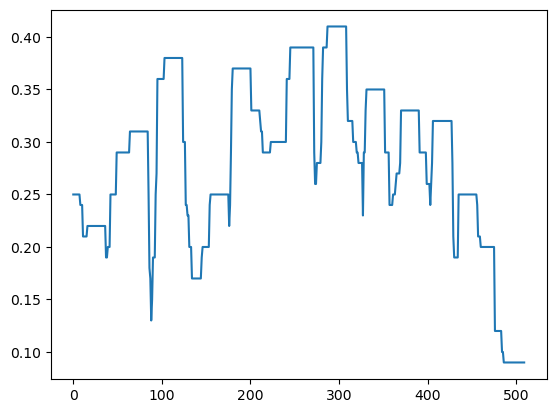

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.1

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
308         308                0          0.59          0.41
307         307                0          0.59          0.41
271         271                0          0.61          0.39
306         306                0          0.61          0.39
302         302                0          0.61          0.39
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGT

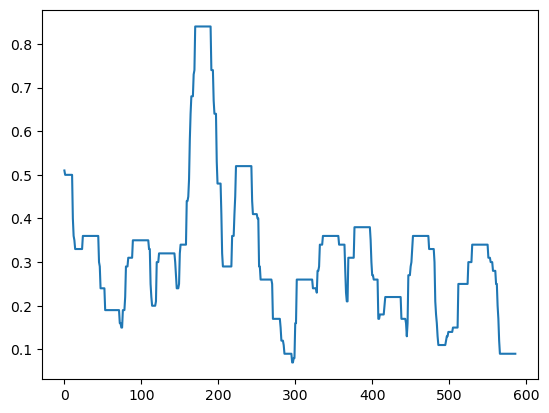

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0.0
score vfp predicted: 0.18

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
190         190                1          0.16          0.84
193         193                1          0.26          0.74
189         189                1          0.26          0.74
191         191                1          0.26          0.74
188         188                1          0.27          0.73
index of true 130


In [19]:
model_name_specific = 'ml/Half_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf' # bastante bom ver! 
# model_name_specific = 'Half_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc'
# model_name_specific = 'ml/half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_gboosting'  # ver 
# model_name_specific = 'ml/half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_rf'  # ver
# model_name_specific = 'half_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc'  #  fraco


# model_name_specific = 'all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf_weights' # pessimo
# model_name_specific = 'all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gboosting'   # pessimo
# model_name_specific = 'all_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc_prob_weights' # acerta alguns.
# model_name_specific = 'ml/All_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc'
# model_name_specific = 'All_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf'
# model_name_specific = 'all_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc'
# model_name_specific = 'ml/all_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_gboosting' # acerta 2


# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gboosting'  # fraco acerta alguns  
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_lr'  # acerta alguns F N G L T V L P P L L T D E M I A Q Y T S A L L A 
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_gnb' # fraco acerta alguns  
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_sgd' # fraco 
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_rf' # scores mt baixos 
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_svc' # acerta alguns. outros n dá nada. 0 e 1 (n tem prob) 
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_linear_svc' # metade preve bem 
# model_name_specific = 'third_Window21_gap1_PHYSALL_NOFSEL_10groupedKFOLD_cluster80_knn' # horrivel

# model_name_specific = 'third_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_svc'
# model_name_specific = 'ml/third_Window21_gap1_PHYSALL_MUTUALSEL_10groupedKFOLD_cluster80_rf'



output(model_name_specific)

# Encoding OHE LSTM

################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


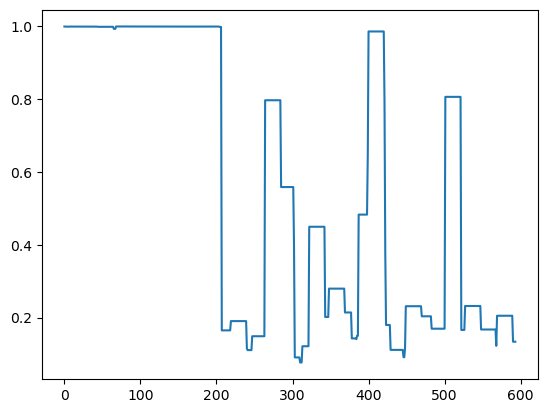

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0.0
score vfp predicted: 0.1684

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
29           29                1        0.0001        0.9999
113         113                1        0.0001        0.9999
90           90                1        0.0001        0.9999
91           91                1        0.0001        0.9999
92           92                1        0.0001        0.9999
index of true 204
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


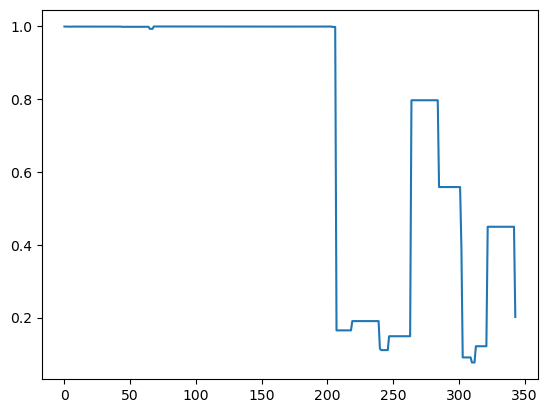

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.999

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
29           29                1        0.0001        0.9999
113         113                1        0.0001        0.9999
90           90                1        0.0001        0.9999
91           91                1        0.0001        0.9999
92           92                1        0.0001        0.9999
index of true 0
################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


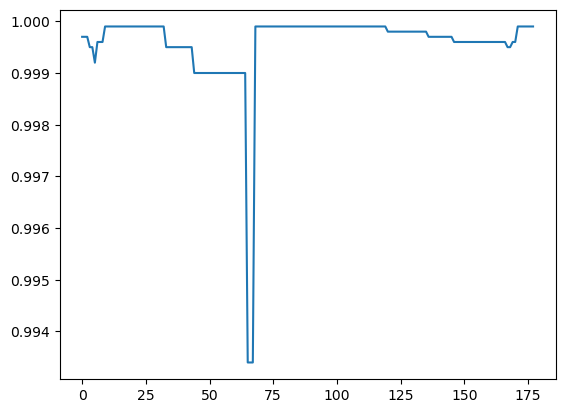

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1.0
score vfp predicted: 0.7393

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
29           29                1        0.0001        0.9999
113         113                1        0.0001        0.9999
90           90                1        0.0001        0.9999
91           91                1        0.0001        0.9999
92           92                1        0.0001        0.9999
index of true 1
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


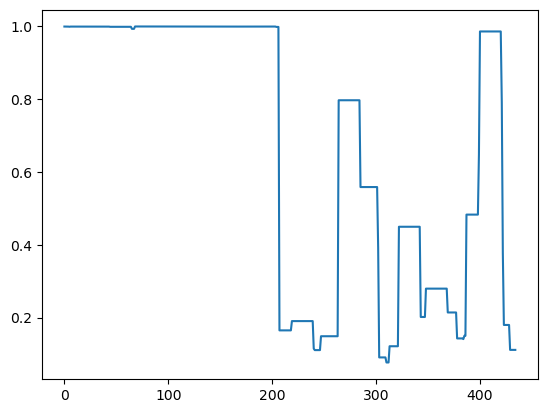

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 0.999

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
29           29                1        0.0001        0.9999
113         113                1        0.0001        0.9999
90           90                1        0.0001        0.9999
91           91                1        0.0001        0.9999
92           92                1        0.0001        0.9999
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


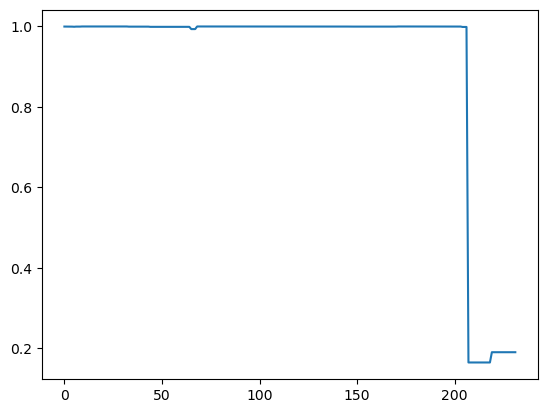

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 1.0
score vfp predicted: 0.999

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
29           29                1        0.0001        0.9999
113         113                1        0.0001        0.9999
90           90                1        0.0001        0.9999
91           91                1        0.0001        0.9999
92           92                1        0.0001        0.9999
index of true 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


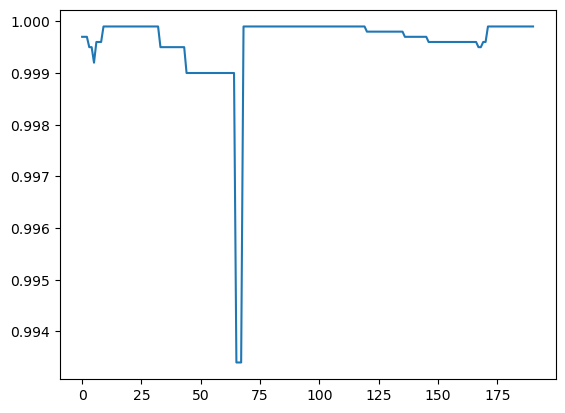

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9904

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
29           29                1        0.0001        0.9999
113         113                1        0.0001        0.9999
90           90                1        0.0001        0.9999
91           91                1        0.0001        0.9999
92           92                1        0.0001        0.9999
index of true 73
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


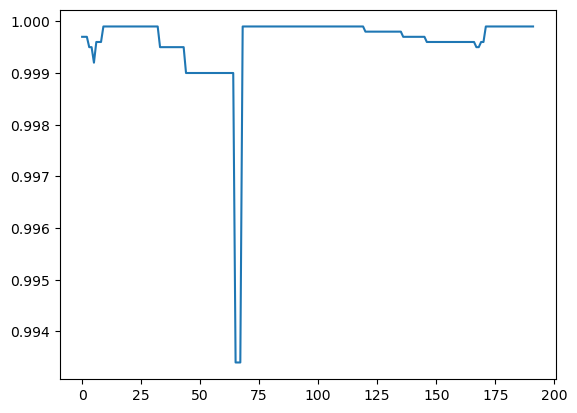

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9823

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
29           29                1        0.0001        0.9999
113         113                1        0.0001        0.9999
90           90                1        0.0001        0.9999
91           91                1        0.0001        0.9999
92           92                1        0.0001        0.9999
index of true 74
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


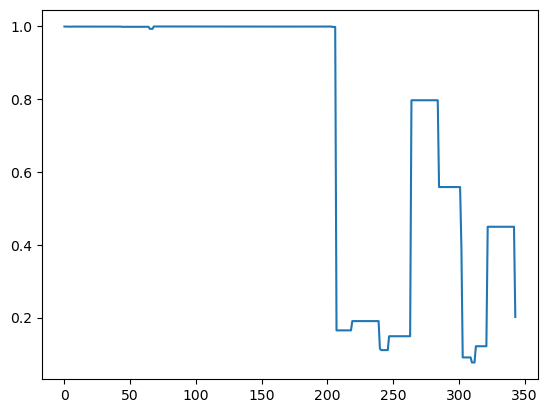

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 0.999

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
29           29                1        0.0001        0.9999
113         113                1        0.0001        0.9999
90           90                1        0.0001        0.9999
91           91                1        0.0001        0.9999
92           92                1        0.0001        0.9999
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


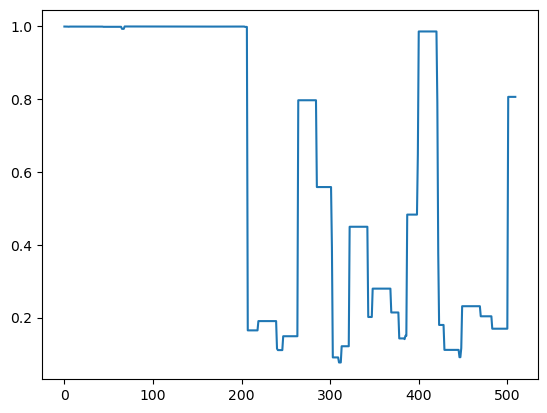

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 1.0
score vfp predicted: 0.999

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
29           29                1        0.0001        0.9999
113         113                1        0.0001        0.9999
90           90                1        0.0001        0.9999
91           91                1        0.0001        0.9999
92           92                1        0.0001        0.9999
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSN

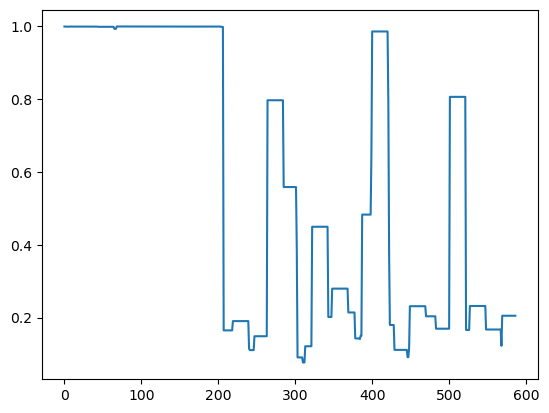

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9049

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
29           29                1        0.0001        0.9999
113         113                1        0.0001        0.9999
90           90                1        0.0001        0.9999
91           91                1        0.0001        0.9999
92           92                1        0.0001        0.9999
index of true 130


In [21]:
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # deu sempre as primeiras sequencias
# model_name_specific = 'dl/third_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # dá tudo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinal' # pessimo. tb dá tudo

# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2' # pessimo. tb dá tudo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2_cwei' #pessimo
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_bayesianFinalV2_cwei' #pessimo
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_att_bayesian_cwei'
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cwei' # melhor mas horrivel na mesma 

# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cwei' # melhor mas horrivel na mesma 
model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV2' #  melhor mas pessimo
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV3'
# model_name_specific = 'dl/all_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV4'
# model_name_specific = 'dl/half_Window21_gap1_ENCODING_OHE_DL_10groupedKFOLD_cluster80_LSTM_cweiV3'


output(model_name_specific)

# WE ML

################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


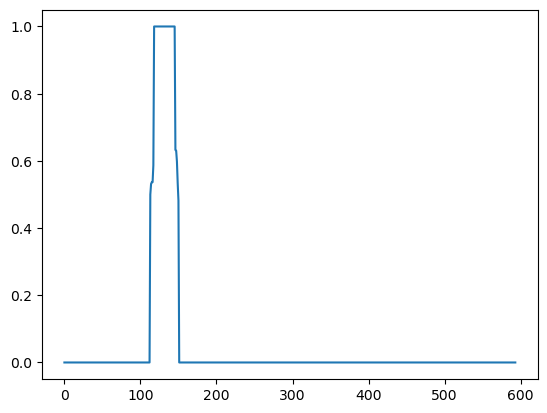

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
140         140                1           0.0           1.0
138         138                1           0.0           1.0
139         139                1           0.0           1.0
145         145                1           0.0           1.0
144         144                1           0.0           1.0
index of true 204
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


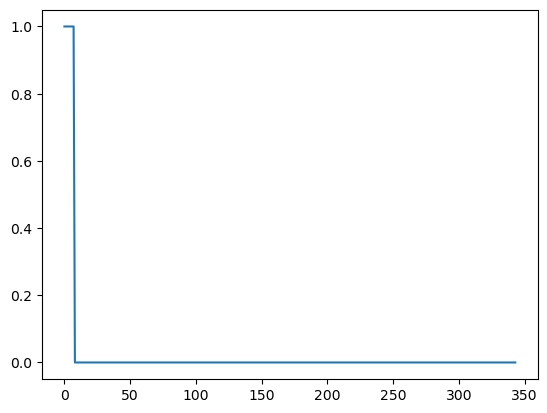

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1           0.0           1.0
2           2                1           0.0           1.0
3           3                1           0.0           1.0
4           4                1           0.0           1.0
5           5                1           0.0           1.0
index of true 0
################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


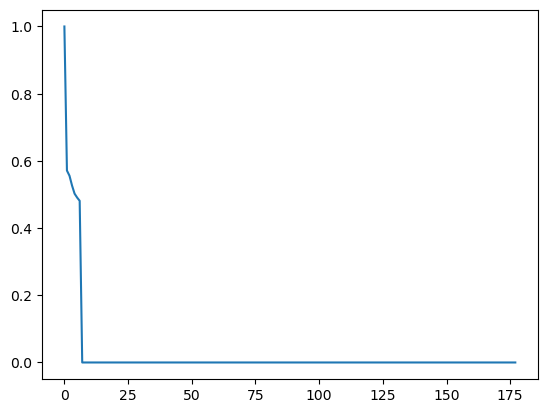

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1.0
score vfp predicted: 0.5712

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1        0.0000        1.0000
1           1                1        0.4288        0.5712
2           2                1        0.4442        0.5558
3           3                1        0.4734        0.5266
4           4                1        0.4976        0.5024
index of true 1
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


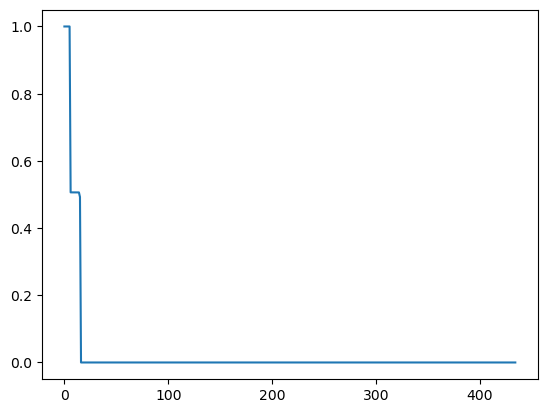

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1           0.0           1.0
4           4                1           0.0           1.0
5           5                1           0.0           1.0
1           1                1           0.0           1.0
3           3                1           0.0           1.0
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


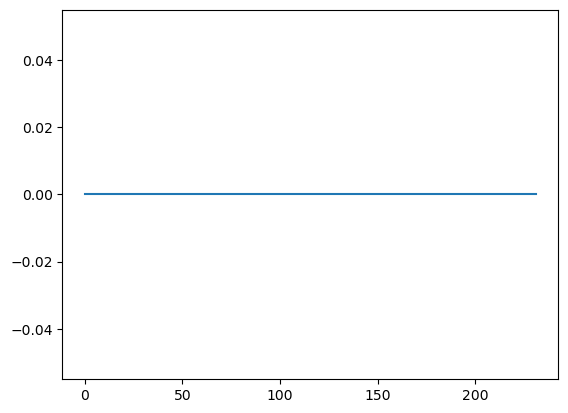

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
0             0                0           1.0           0.0
134         134                0           1.0           0.0
136         136                0           1.0           0.0
137         137                0           1.0           0.0
138         138                0           1.0           0.0
index of true 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


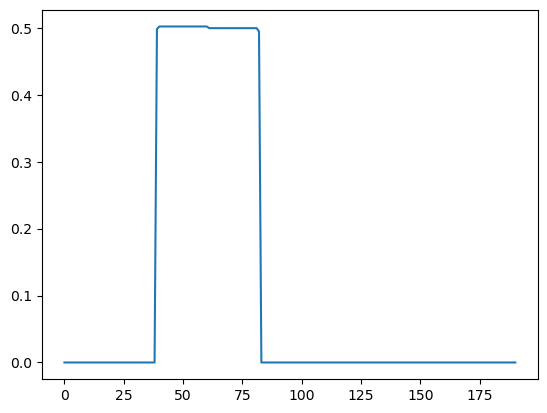

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
60          60                1        0.4980        0.5020
81          81                0        0.5005        0.4995
59          59                0        0.5019        0.4981
82          82                0        0.5053        0.4947
0            0                0        1.0000        0.0000
index of true 73
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


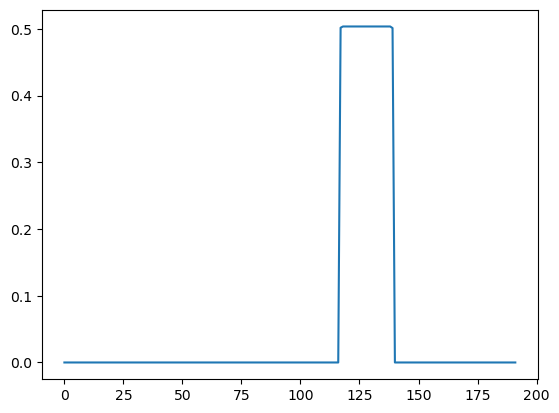

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
138         138                1        0.4965        0.5035
137         137                1        0.4984        0.5016
139         139                1        0.4989        0.5011
0             0                0        1.0000        0.0000
118         118                0        1.0000        0.0000
index of true 74
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


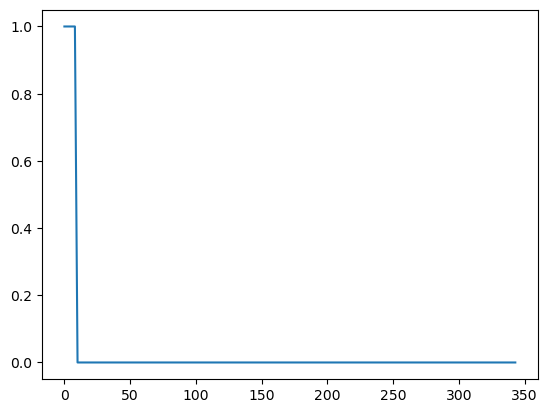

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1           0.0           1.0
1           1                1           0.0           1.0
2           2                1           0.0           1.0
3           3                1           0.0           1.0
4           4                1           0.0           1.0
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


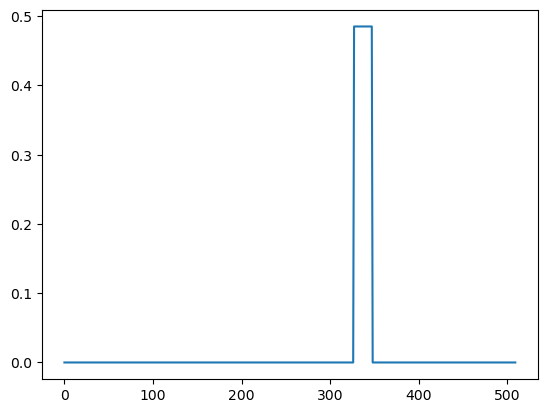

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
347         347                0        0.5149        0.4851
0             0                0        1.0000        0.0000
323         323                0        1.0000        0.0000
335         335                0        1.0000        0.0000
334         334                0        1.0000        0.0000
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGT

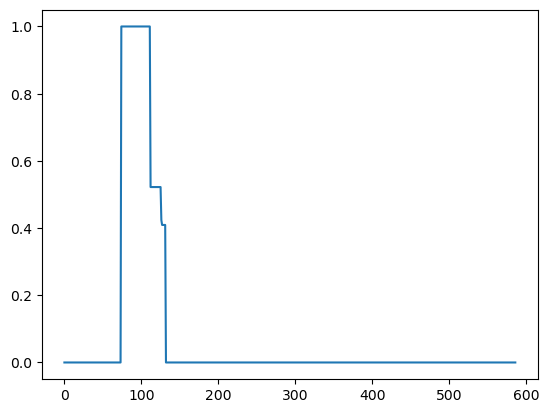

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0.0
score vfp predicted: 0.3474

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
107         107                1           0.0           1.0
95           95                1           0.0           1.0
103         103                1           0.0           1.0
102         102                1           0.0           1.0
101         101                1           0.0           1.0
index of true 130


In [25]:

# WE method in each protein gets 100 dim
 
# model_name_specific = 'all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc'  #  fiz overwrite sem querer. é WEmetod3 recorrer
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf' # mau    # fiz overwrite sem querer. é WEmetod3 recorrer
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gboosting' # mau
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn' # ver este
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # há piores

# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf'
# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # mau 
# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn'  
# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # há piores

# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf'
# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # mau
# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_gnb' # mau
# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_knn' # mau

output(model_name_specific)


################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


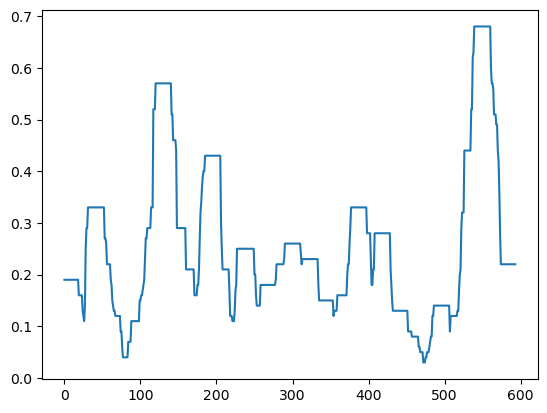

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0.0
score vfp predicted: 0.38

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
559         559                1          0.32          0.68
560         560                1          0.32          0.68
558         558                1          0.37          0.63
557         557                1          0.38          0.62
561         561                1          0.40          0.60
index of true 204
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


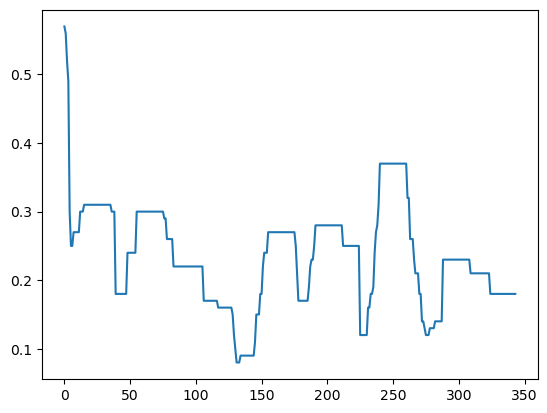

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.57

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
0             0                1          0.43          0.57
1             1                1          0.44          0.56
2             2                1          0.48          0.52
3             3                0          0.51          0.49
260         260                0          0.63          0.37
index of true 0
################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


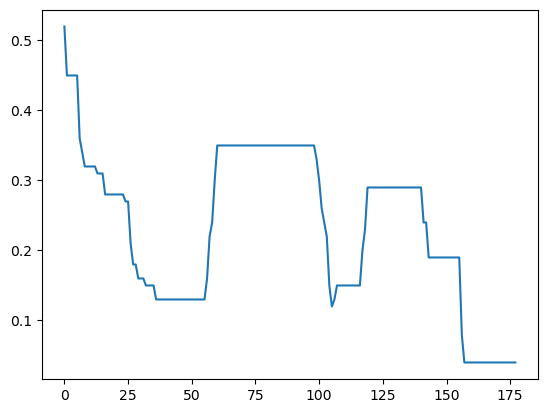

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 0.0
score vfp predicted: 0.45

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1          0.48          0.52
1           1                0          0.55          0.45
5           5                0          0.55          0.45
3           3                0          0.58          0.42
4           4                0          0.60          0.40
index of true 1
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


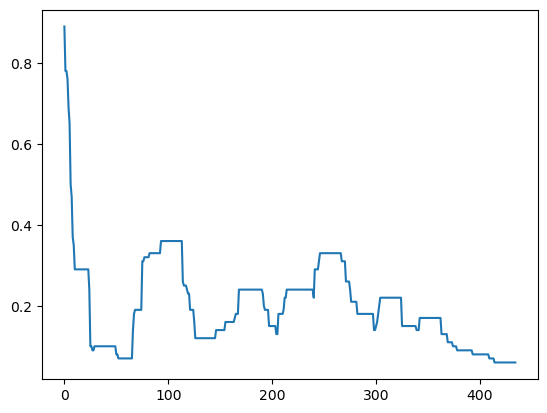

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 0.89

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1          0.11          0.89
2           2                1          0.22          0.78
3           3                1          0.24          0.76
1           1                1          0.24          0.76
4           4                1          0.31          0.69
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


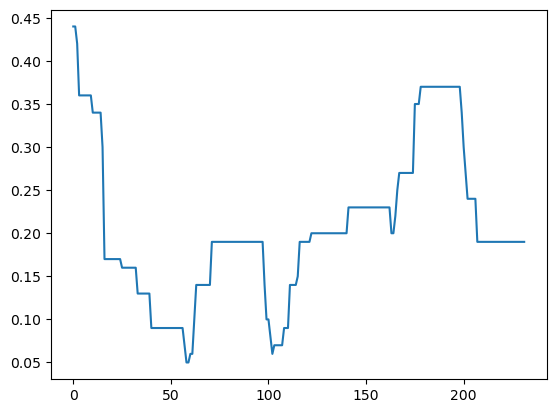

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0.0
score vfp predicted: 0.41

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
1             1                0          0.56          0.44
2             2                0          0.58          0.42
0             0                0          0.59          0.41
198         198                0          0.63          0.37
3             3                0          0.64          0.36
index of true 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


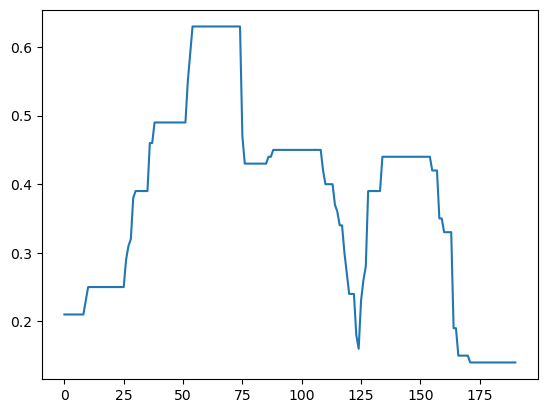

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 0.59

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
74          74                1          0.37          0.63
73          73                1          0.41          0.59
72          72                1          0.45          0.55
58          58                0          0.51          0.49
61          61                0          0.52          0.48
index of true 73
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


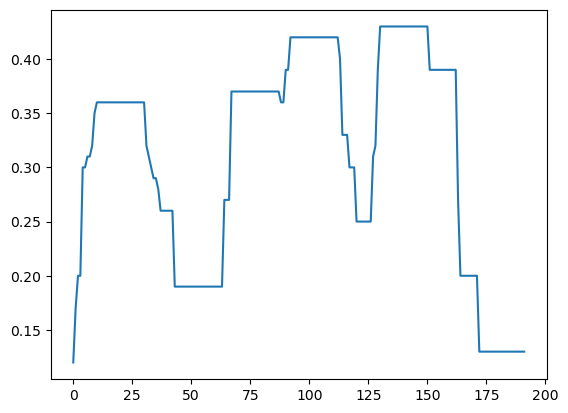

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0.0
score vfp predicted: 0.16

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
150         150                0          0.57          0.43
112         112                0          0.58          0.42
113         113                0          0.60          0.40
162         162                0          0.61          0.39
155         155                0          0.61          0.39
index of true 74
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


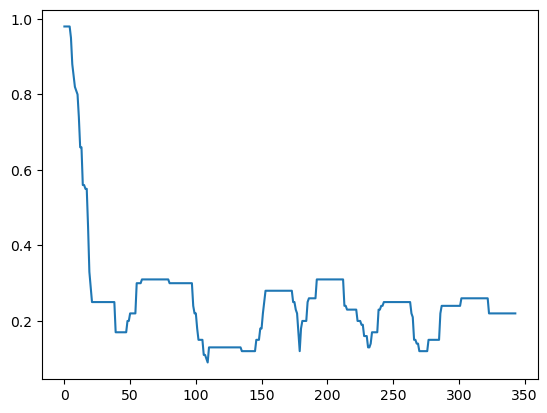

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 0.97

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
1           1                1          0.02          0.98
4           4                1          0.02          0.98
0           0                1          0.03          0.97
5           5                1          0.05          0.95
2           2                1          0.07          0.93
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


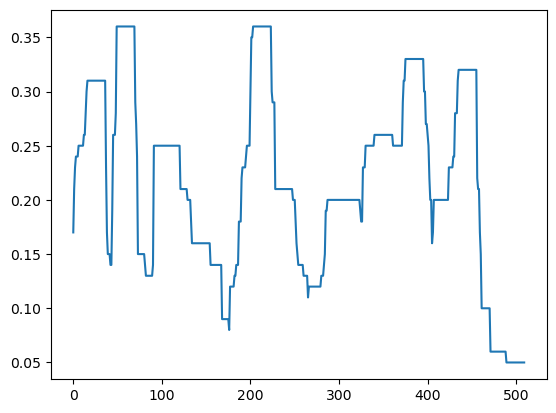

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.05

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
223         223                0          0.64          0.36
69           69                0          0.64          0.36
221         221                0          0.65          0.35
395         395                0          0.67          0.33
222         222                0          0.67          0.33
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNG

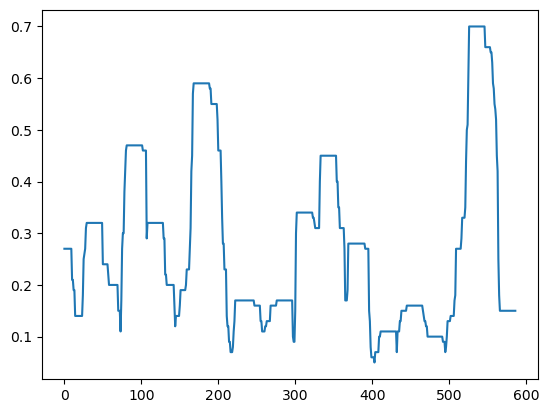

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0.0
score vfp predicted: 0.29

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
546         546                1          0.30          0.70
547         547                1          0.34          0.66
553         553                1          0.34          0.66
548         548                1          0.35          0.65
554         554                1          0.35          0.65
index of true 130


In [27]:
model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_rf'
output(model_name_specific)


################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


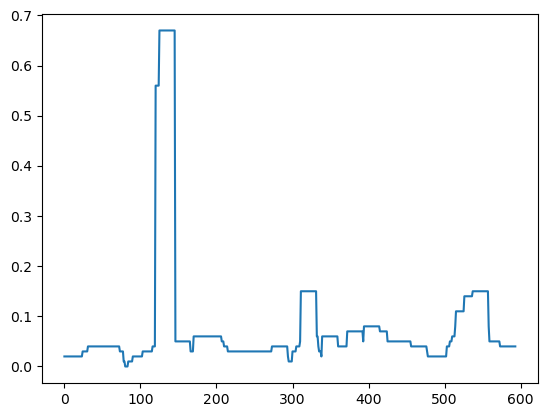

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0.0
score vfp predicted: 0.04

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
145         145                1          0.33          0.67
140         140                1          0.44          0.56
141         141                0          0.60          0.40
557         557                0          0.85          0.15
331         331                0          0.85          0.15
index of true 204
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


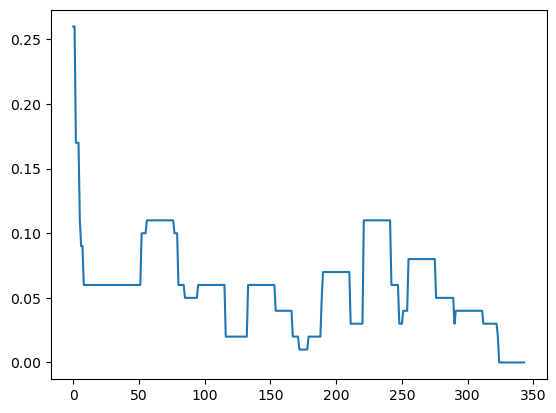

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 0.0
score vfp predicted: 0.25

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
1             1                0          0.74          0.26
0             0                0          0.75          0.25
4             4                0          0.83          0.17
241         241                0          0.89          0.11
5             5                0          0.89          0.11
index of true 0
################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


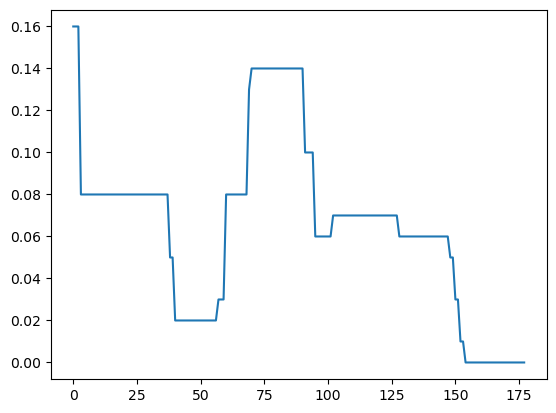

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 0.0
score vfp predicted: 0.04

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
2            2                0          0.84          0.16
90          90                0          0.86          0.14
89          89                0          0.87          0.13
94          94                0          0.90          0.10
33          33                0          0.92          0.08
index of true 1
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


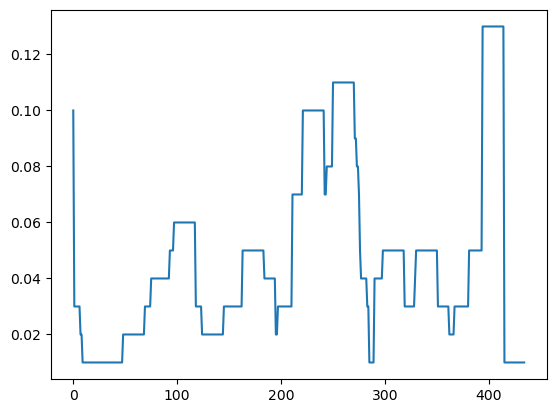

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 0.0
score vfp predicted: 0.1

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
414         414                0          0.87          0.13
270         270                0          0.89          0.11
0             0                0          0.90          0.10
241         241                0          0.90          0.10
272         272                0          0.91          0.09
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


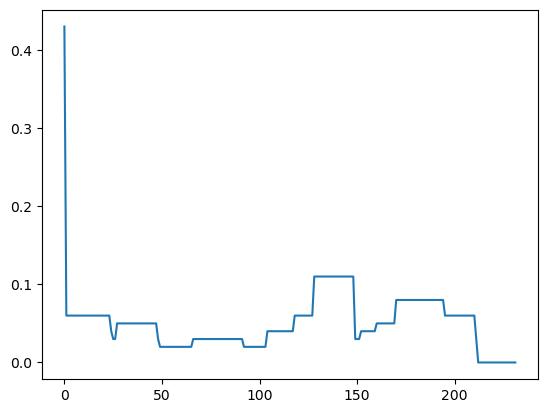

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 0.0
score vfp predicted: 0.43

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
0             0                0          0.57          0.43
148         148                0          0.89          0.11
190         190                0          0.92          0.08
194         194                0          0.92          0.08
4             4                0          0.94          0.06
index of true 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


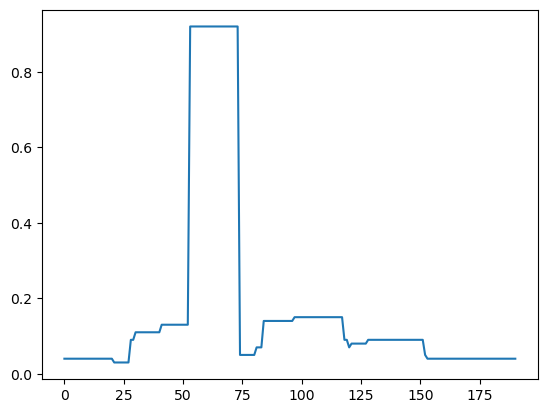

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 0.92

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
73           73                1          0.08          0.92
117         117                0          0.85          0.15
113         113                0          0.86          0.14
104         104                0          0.86          0.14
61           61                0          0.87          0.13
index of true 73
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


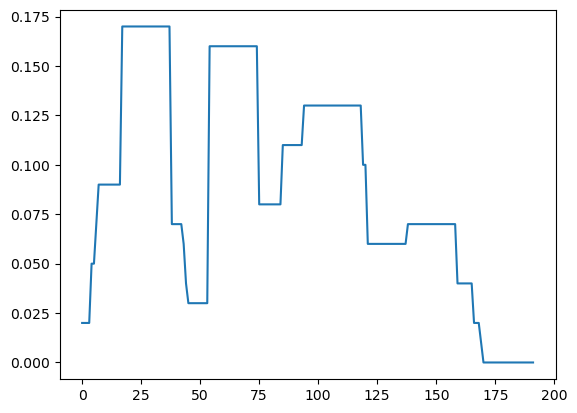

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0.0
score vfp predicted: 0.16

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
37           37                0          0.83          0.17
74           74                0          0.84          0.16
114         114                0          0.87          0.13
118         118                0          0.87          0.13
117         117                0          0.89          0.11
index of true 74
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


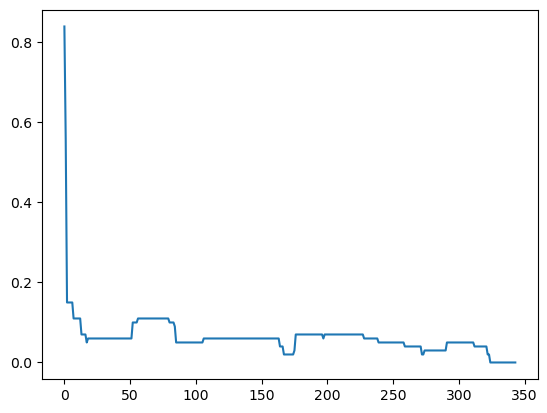

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 0.84

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1          0.16          0.84
1           1                1          0.44          0.56
6           6                0          0.85          0.15
4           4                0          0.87          0.13
5           5                0          0.87          0.13
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


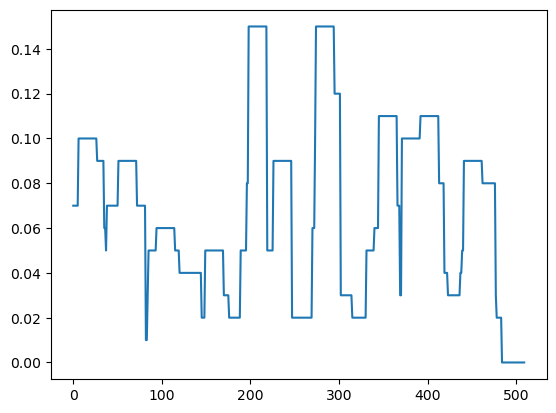

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
218         218                0          0.85          0.15
294         294                0          0.85          0.15
301         301                0          0.88          0.12
412         412                0          0.89          0.11
365         365                0          0.89          0.11
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGT

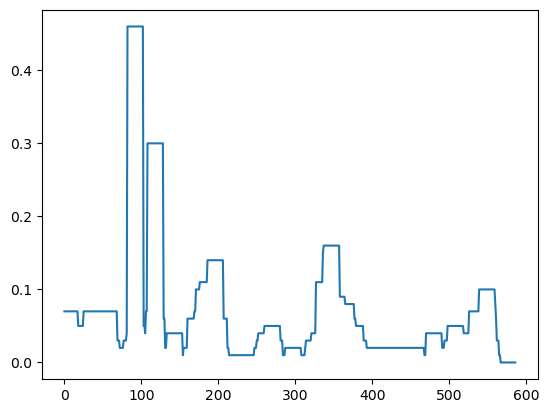

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0.0
score vfp predicted: 0.06

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
102         102                0          0.54          0.46
128         128                0          0.70          0.30
357         357                0          0.84          0.16
356         356                0          0.85          0.15
206         206                0          0.86          0.14
index of true 130


In [30]:

# method 1 19*100
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_10groupedKFOLD_cluster80_svc' # prevÊ 3 xb   FEZ OVERWRITE DOS DE CIMA
model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf'
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # há piores
# model_name_specific = 'ml/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_knn' # mau


# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf' # mau
# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_svc' # pessimo
# model_name_specific = 'ml/half_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # mau


# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_rf' # mau
# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_svc' # pessimo
# model_name_specific = 'ml/third_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_gnb' # 

output(model_name_specific)

# WE + LSTM  

################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


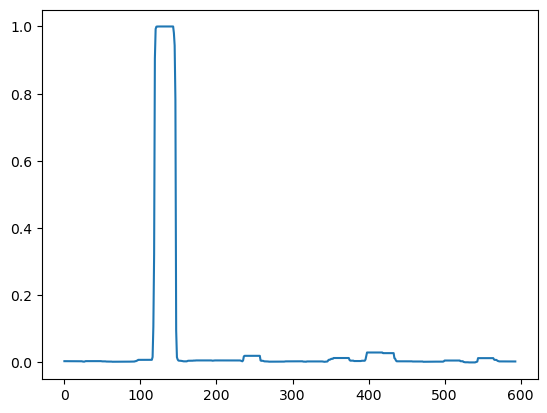

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0016

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
143         143                1        0.0000        1.0000
142         142                1        0.0001        0.9999
141         141                1        0.0006        0.9994
140         140                1        0.0074        0.9926
144         144                1        0.0194        0.9806
index of true 204
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


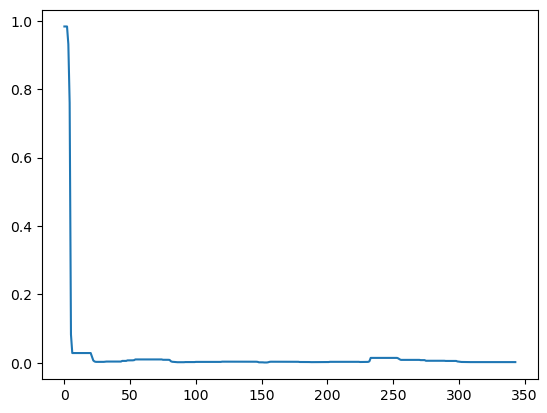

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9009

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
2           2                1        0.0163        0.9837
1           1                1        0.0180        0.9820
3           3                1        0.0680        0.9320
0           0                1        0.0991        0.9009
4           4                1        0.2401        0.7599
index of true 0
################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


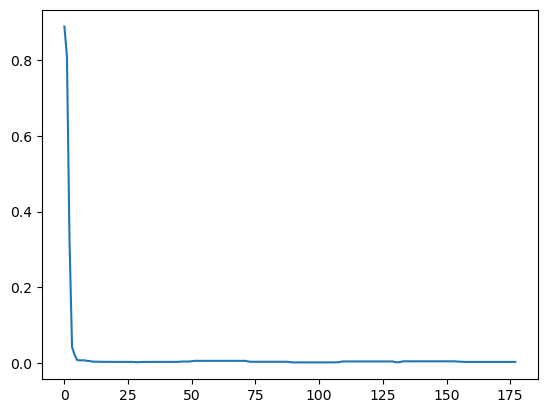

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1.0
score vfp predicted: 0.8095

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1        0.1115        0.8885
1           1                1        0.1905        0.8095
2           2                0        0.6732        0.3268
3           3                0        0.9577        0.0423
4           4                0        0.9779        0.0221
index of true 1
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


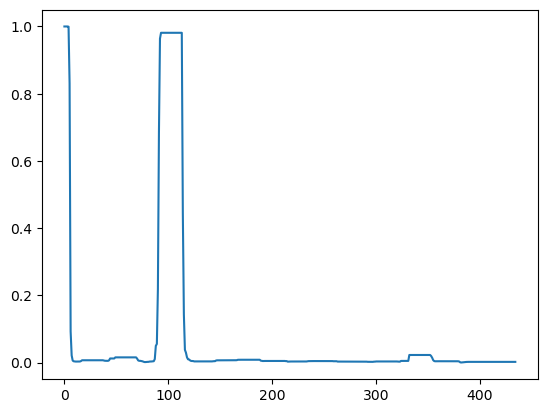

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1        0.0000        1.0000
2           2                1        0.0000        1.0000
3           3                1        0.0000        1.0000
1           1                1        0.0000        1.0000
4           4                1        0.0006        0.9994
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


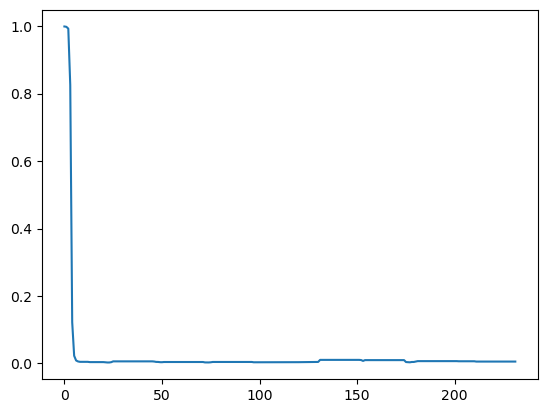

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9991

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1        0.0009        0.9991
1           1                1        0.0019        0.9981
2           2                1        0.0073        0.9927
3           3                1        0.1744        0.8256
4           4                0        0.8780        0.1220
index of true 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


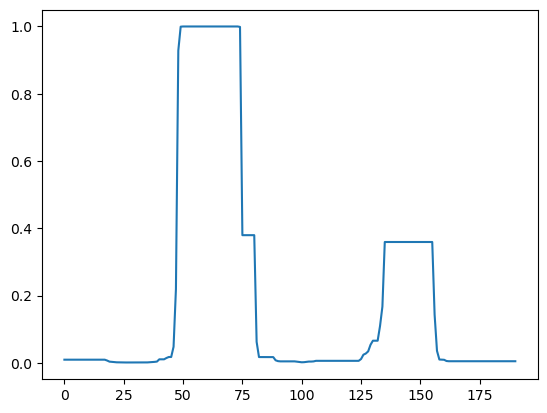

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
73          73                1        0.0000        1.0000
72          72                1        0.0000        1.0000
71          71                1        0.0000        1.0000
70          70                1        0.0000        1.0000
69          69                1        0.0006        0.9994
index of true 73
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


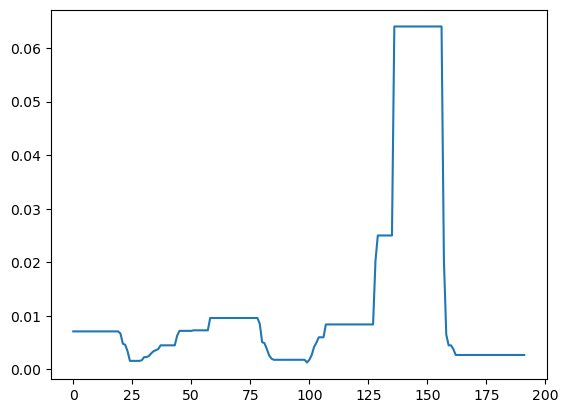

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0041

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
156         156                0        0.9360        0.0640
149         149                0        0.9750        0.0250
155         155                0        0.9764        0.0236
157         157                0        0.9796        0.0204
148         148                0        0.9798        0.0202
index of true 74
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


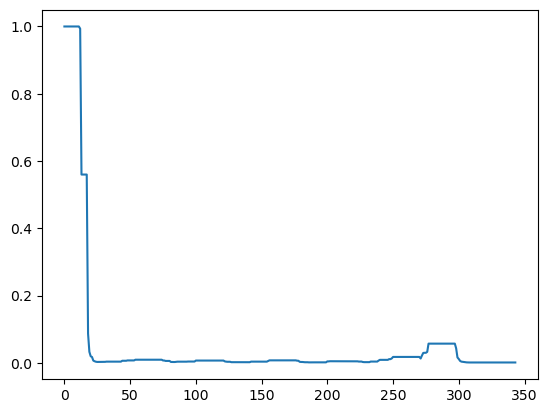

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1           0.0           1.0
2           2                1           0.0           1.0
3           3                1           0.0           1.0
4           4                1           0.0           1.0
5           5                1           0.0           1.0
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


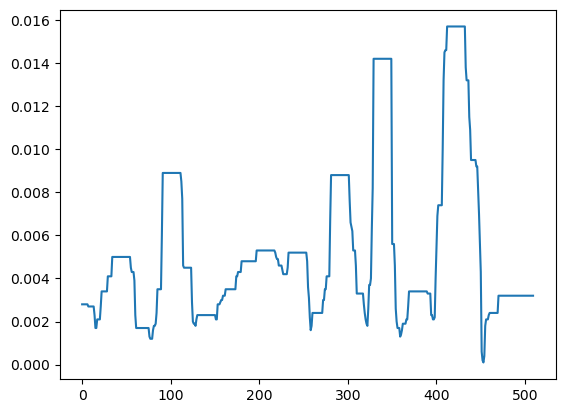

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.0003

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
432         432                0        0.9843        0.0157
430         430                0        0.9854        0.0146
429         429                0        0.9855        0.0145
431         431                0        0.9855        0.0145
349         349                0        0.9858        0.0142
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVS

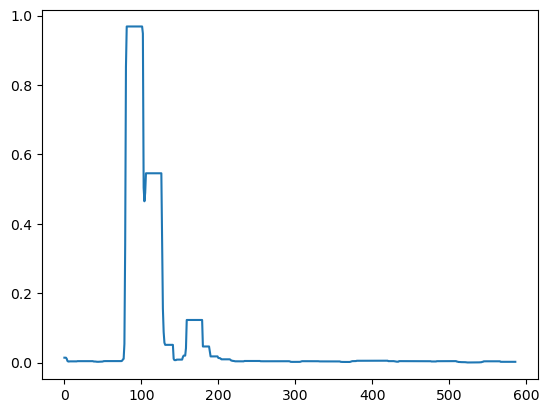

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0571

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
101         101                1        0.0315        0.9685
102         102                1        0.0518        0.9482
100         100                1        0.1483        0.8517
126         126                1        0.4546        0.5454
103         103                1        0.4960        0.5040
index of true 130


In [34]:

# model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm1' # nao é mau 
# model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm2' # nao é mau ver 
# model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm3' # nao é mau ver 
# model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm4' # nao é mau ver 
model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm5' #  ver 
# model_name_specific = 'dl/all_Window21_gap1_WEPROTVEC_method1_10groupedKFOLD_cluster80_lstm6' # nao é mau ver

output(model_name_specific)

# Transformers fine tuned 3 epochs

################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


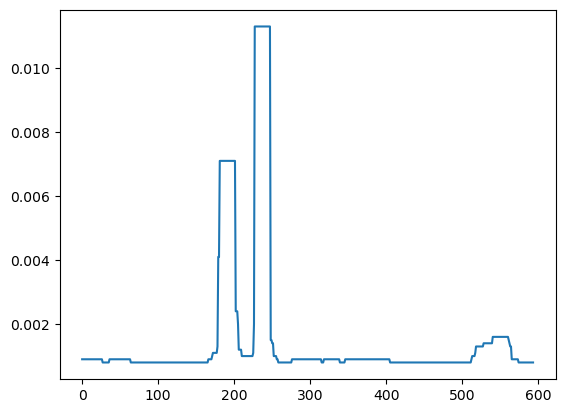

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
score vfp predicted: 0.0024059414863586

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
247         247  LABEL_0  0.988700                0      0.988700   
201         201  LABEL_0  0.992851                0      0.992851   
199         199  LABEL_0  0.995917                0      0.995917   
200         200  LABEL_0  0.996949                0      0.996949   
204         204  LABEL_0  0.997594                0      0.997594   

     prob_class_1  
247      0.011300  
201      0.007149  
199      0.004083  
200      0.003051  
204      0.002406  
index of true 204
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


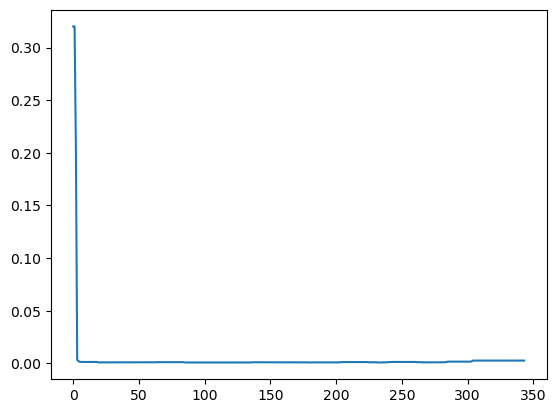

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 0
score vfp predicted: 0.2124847173690796

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
1             1  LABEL_0  0.679865                0      0.679865   
0             0  LABEL_0  0.787515                0      0.787515   
2             2  LABEL_0  0.796775                0      0.796775   
3             3  LABEL_0  0.996721                0      0.996721   
324         324  LABEL_0  0.997397                0      0.997397   

     prob_class_1  
1        0.320135  
0        0.212485  
2        0.203225  
3        0.003279  
324      0.002603  
index of true 0
################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


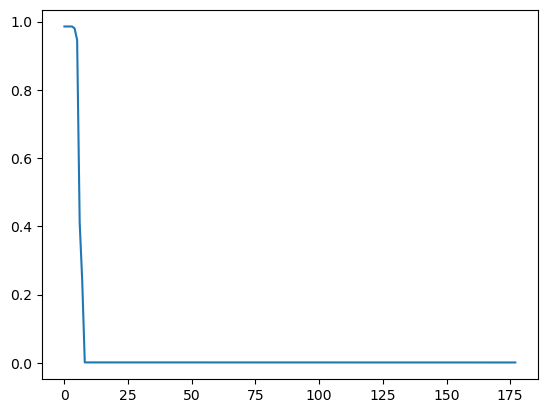

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
score vfp predicted: 0.92803156375885

 max score predicted

 top scores
   Unnamed: 0    label     score  class predicted  prob_class_0  prob_class_1
3           3  LABEL_1  0.985935                1      0.014065      0.985935
4           4  LABEL_1  0.980421                1      0.019579      0.980421
2           2  LABEL_1  0.965615                1      0.034385      0.965615
5           5  LABEL_1  0.946208                1      0.053792      0.946208
1           1  LABEL_1  0.928032                1      0.071968      0.928032
index of true 1
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


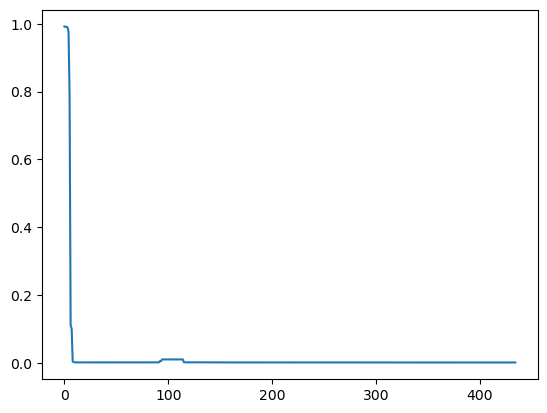

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
score vfp predicted: 0.9919265508651732

 max score predicted

 top scores
   Unnamed: 0    label     score  class predicted  prob_class_0  prob_class_1
0           0  LABEL_1  0.991927                1      0.008073      0.991927
2           2  LABEL_1  0.990797                1      0.009203      0.990797
1           1  LABEL_1  0.990446                1      0.009554      0.990446
3           3  LABEL_1  0.988982                1      0.011018      0.988982
4           4  LABEL_1  0.976439                1      0.023561      0.976439
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


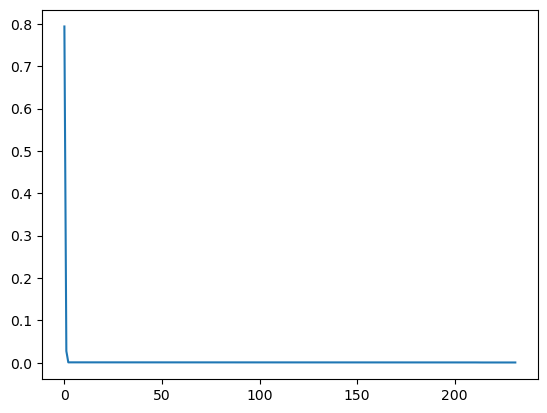

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 1
score vfp predicted: 0.7936785221099854

 max score predicted

 top scores
    Unnamed: 0    label     score  class predicted  prob_class_0  prob_class_1
0            0  LABEL_1  0.793679                1      0.206321      0.793679
1            1  LABEL_0  0.972252                0      0.972252      0.027748
10          10  LABEL_0  0.998997                0      0.998997      0.001003
99          99  LABEL_0  0.999061                0      0.999061      0.000939
20          20  LABEL_0  0.999063                0      0.999063      0.000937
index of true 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


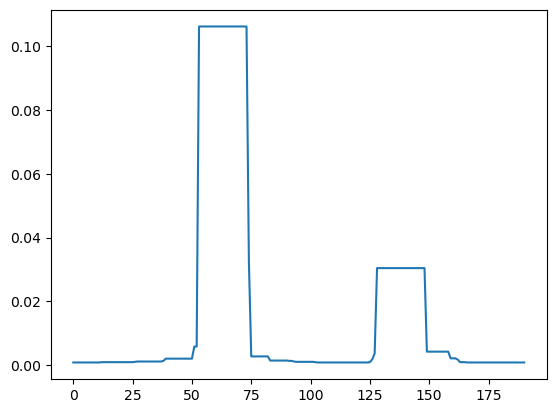

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 0.1061553955078125

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
73           73  LABEL_0  0.893845                0      0.893845   
74           74  LABEL_0  0.967516                0      0.967516   
148         148  LABEL_0  0.969582                0      0.969582   
71           71  LABEL_0  0.994161                0      0.994161   
72           72  LABEL_0  0.995273                0      0.995273   

     prob_class_1  
73       0.106155  
74       0.032484  
148      0.030418  
71      

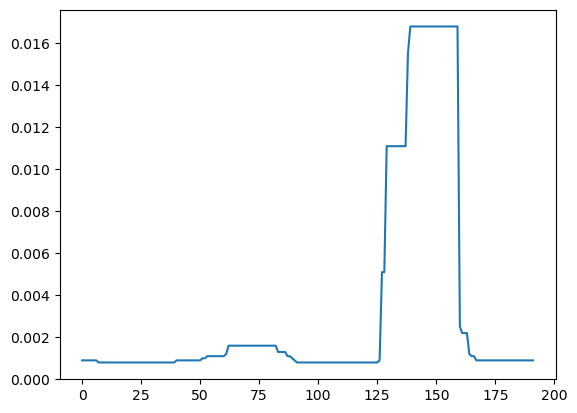

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
score vfp predicted: 0.0009878873825073

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
159         159  LABEL_0  0.983241                0      0.983241   
158         158  LABEL_0  0.984483                0      0.984483   
149         149  LABEL_0  0.988872                0      0.988872   
147         147  LABEL_0  0.994942                0      0.994942   
150         150  LABEL_0  0.995520                0      0.995520   

     prob_class_1  
159      0.016759  
158      0.015517  
149      0.011128  
147      0.005058  
150      0.004480  
index of true 74
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFL

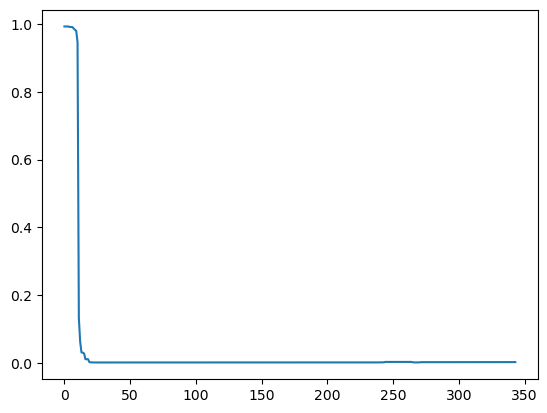

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
score vfp predicted: 0.9921699166297911

 max score predicted

 top scores
   Unnamed: 0    label     score  class predicted  prob_class_0  prob_class_1
3           3  LABEL_1  0.993003                1      0.006997      0.993003
0           0  LABEL_1  0.992170                1      0.007830      0.992170
6           6  LABEL_1  0.991483                1      0.008517      0.991483
5           5  LABEL_1  0.990435                1      0.009565      0.990435
4           4  LABEL_1  0.988080                1      0.011920      0.988080
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


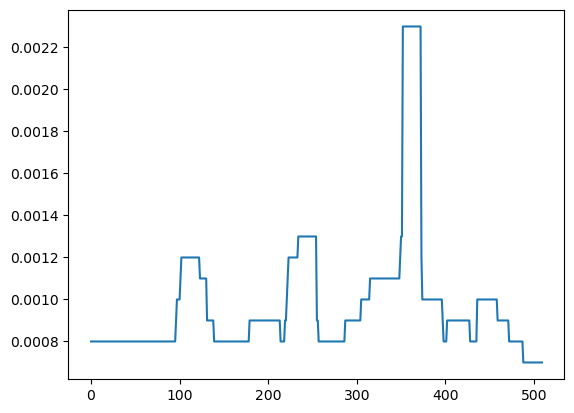

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
score vfp predicted: 0.000720202922821

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
372         372  LABEL_0  0.997703                0      0.997703   
254         254  LABEL_0  0.998732                0      0.998732   
370         370  LABEL_0  0.998737                0      0.998737   
371         371  LABEL_0  0.998742                0      0.998742   
369         369  LABEL_0  0.998784                0      0.998784   

     prob_class_1  
372      0.002297  
254      0.001268  
370      0.001263  
371      0.001258  
369      0.001216  
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYEN

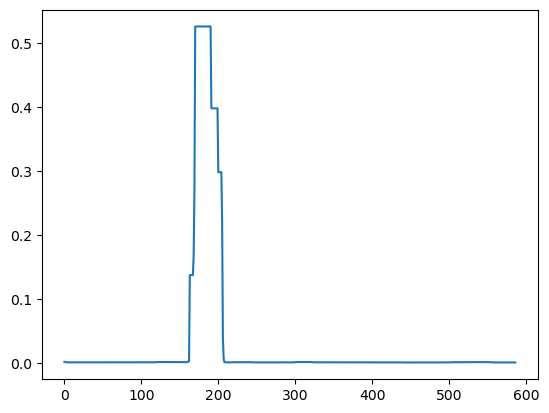

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
score vfp predicted: 0.0007297396659851

 max score predicted

 top scores
     Unnamed: 0    label     score  class predicted  prob_class_0  \
190         190  LABEL_1  0.525834                1      0.474166   
199         199  LABEL_0  0.602084                0      0.602084   
204         204  LABEL_0  0.701935                0      0.701935   
202         202  LABEL_0  0.711191                0      0.711191   
201         201  LABEL_0  0.730299                0      0.730299   

     prob_class_1  
190      0.525834  
199      0.397916  
204      0.298065  
202      0.288809  
201      0.269701  
index of true 130


In [35]:
# transformers fine tune and predict (no model no hyper changed)
# the smallest
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80' # mau 
model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80' # melhor mas mau na mesma 
model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_esm2_t6_8M_UR50D_finetune_class_10groupedKFOLD_cluster80'

model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook/esm2_t12_35M_UR50D_finetune_class_10groupedKFOLD_cluster80' # preve mt coisa
model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_esm2_t36_3B_UR50D_finetune_class_10groupedKFOLD_cluster80' # preve mt coisa
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook/esm2_t12_35M_UR50D_finetune_class_10groupedKFOLD_cluster80'# prevê 4
output(model_name_specific)

# ESM2b representations + ML 

################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


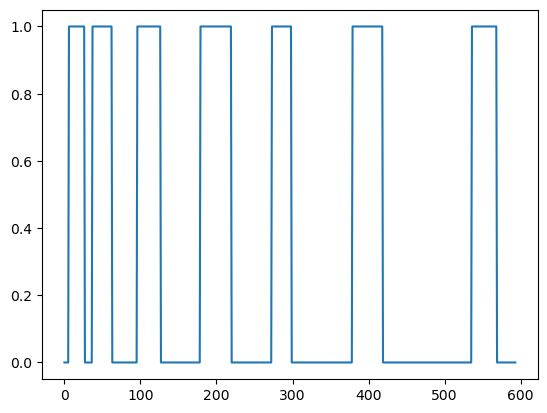

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0
index of true 204
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


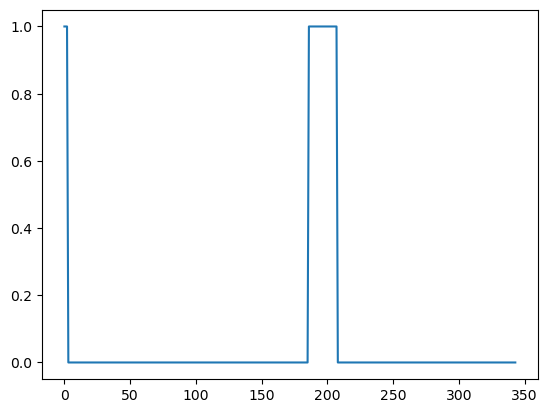

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1
index of true 0
################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


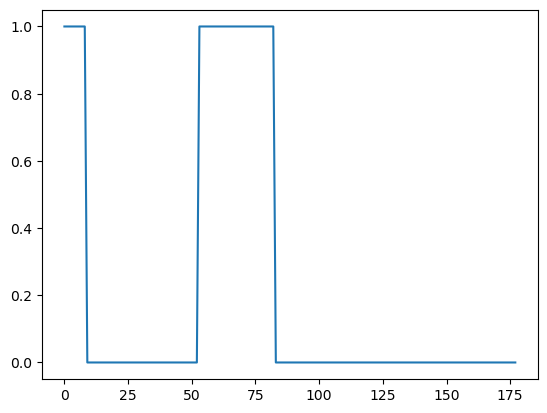

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1
index of true 1
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


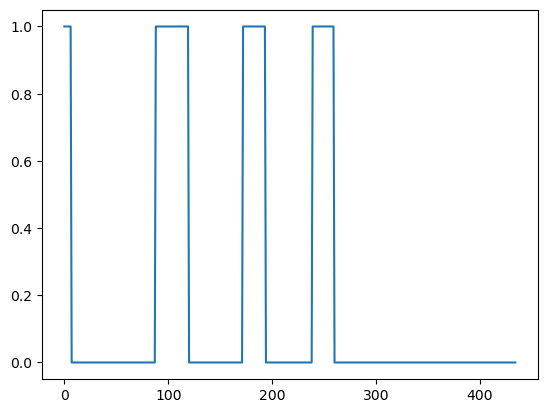

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


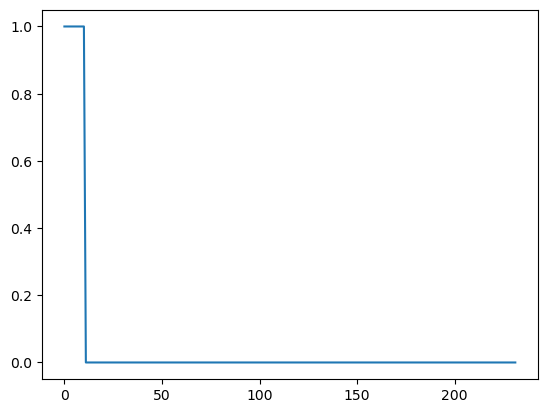

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 1
index of true 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


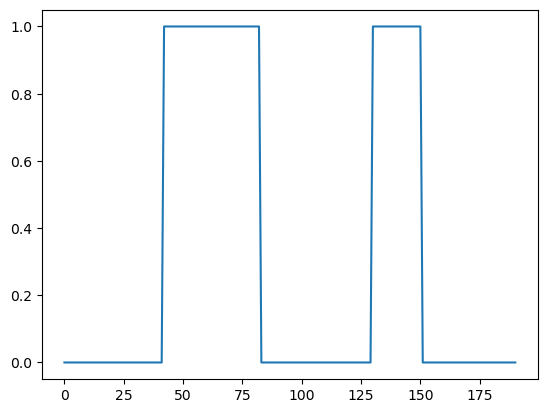

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1
index of true 73
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


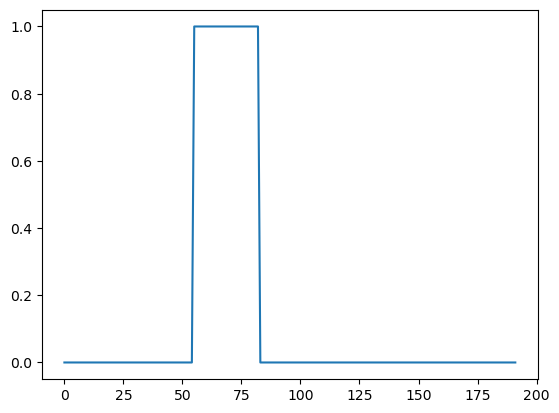

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0
index of true 74
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


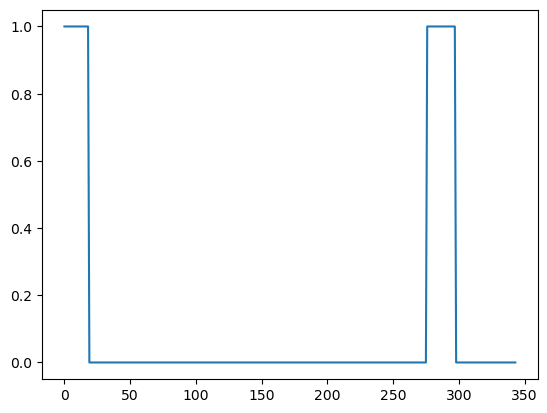

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


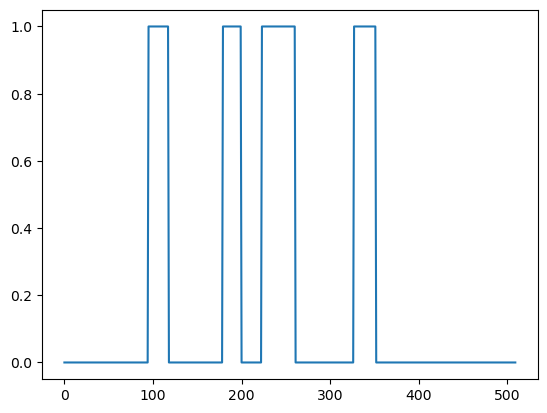

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCCSCGSCCKFDEDDSEPVLKGVKLHYT
vfp model prediction


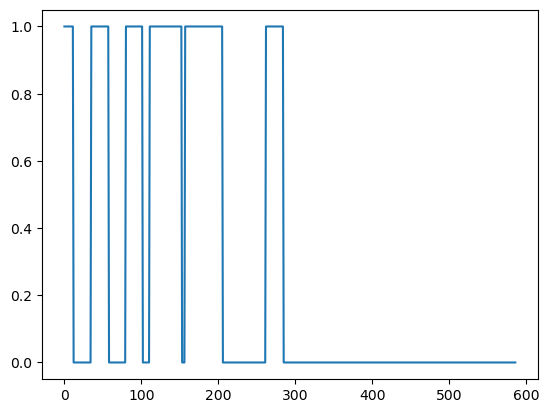

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0
index of true 130


In [36]:


# get the representations nad feed to a model ãfinal é pretrained.esm2_t33_650M_UR50D    (esqueci me de mudar a string)
model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve 4 
model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau
model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau


model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # acerta quase todos mas tb outros 
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau no geral 
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb'

# model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # mau. preve mt coisa
# model_name_specific ='ml/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau pior q third
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau mas ja vi pior 


# # o pequeno 
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve 6
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # pessimo
# model_name_specific = 'ml/all_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau

# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve mt coisa0
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau
# model_name_specific = 'ml/third_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # 

# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_svc' # preve mt coisa0
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_rf' # mau
# model_name_specific = 'ml/half_Window21_gap1_TRANSFORMER_T68M_facebook_esm2_t6_8M_UR50D_class_class_10groupedKFOLD_cluster80_gnb' # mau


output(model_name_specific)

# ESM2b representations + DL

################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


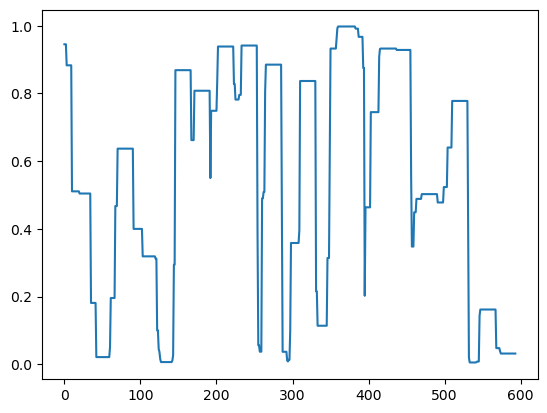

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0059

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
382         382                1        0.0021        0.9979
380         380                1        0.0022        0.9978
379         379                1        0.0073        0.9927
386         386                1        0.0085        0.9915
381         381                1        0.0115        0.9885
index of true 204
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


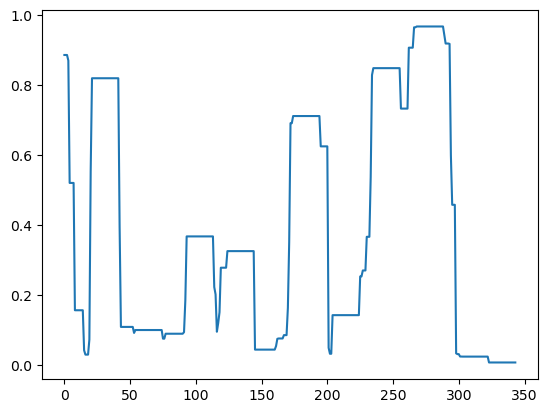

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.574

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
288         288                1        0.0315        0.9685
286         286                1        0.0339        0.9661
289         289                1        0.0559        0.9441
292         292                1        0.0803        0.9197
293         293                1        0.0813        0.9187
index of true 0
################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


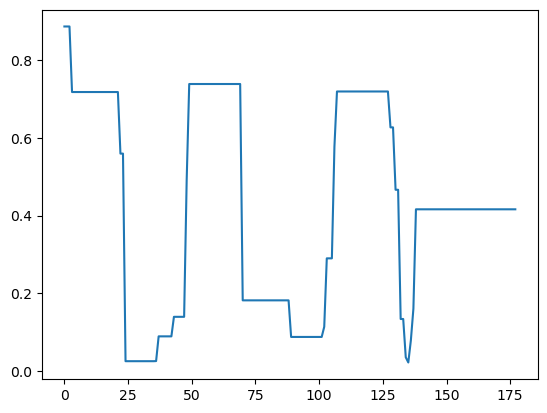

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1.0
score vfp predicted: 0.7241

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
2             2                1        0.1142        0.8858
69           69                1        0.2620        0.7380
1             1                1        0.2759        0.7241
127         127                1        0.2812        0.7188
21           21                1        0.2826        0.7174
index of true 1
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


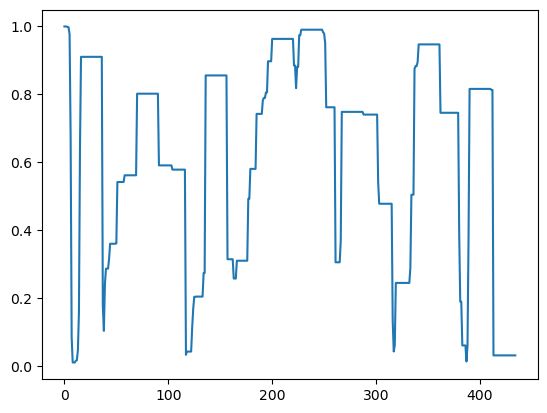

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1        0.0000        1.0000
1           1                1        0.0000        1.0000
2           2                1        0.0000        1.0000
3           3                1        0.0016        0.9984
4           4                1        0.0022        0.9978
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


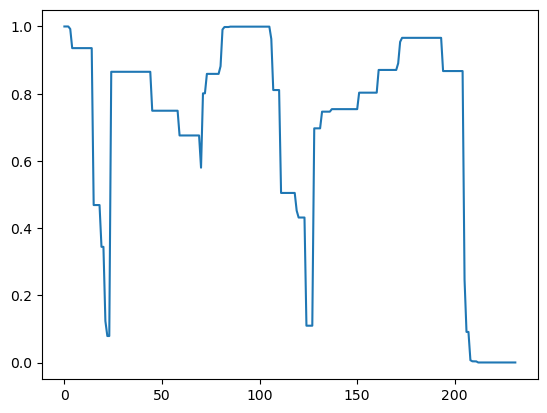

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
0             0                1        0.0000        1.0000
2             2                1        0.0000        1.0000
1             1                1        0.0000        1.0000
105         105                1        0.0005        0.9995
102         102                1        0.0016        0.9984
index of true 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


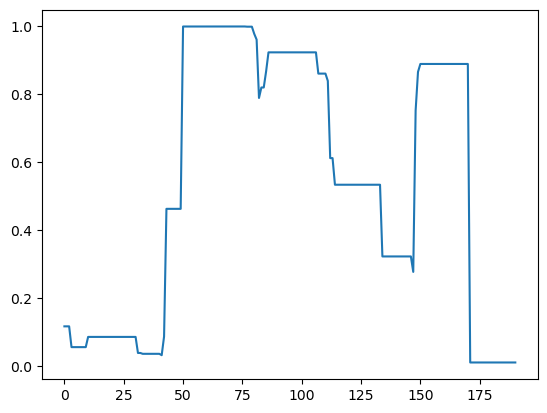

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
72          72                1        0.0000        1.0000
73          73                1        0.0000        1.0000
74          74                1        0.0000        1.0000
76          76                1        0.0000        1.0000
70          70                1        0.0001        0.9999
index of true 73
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


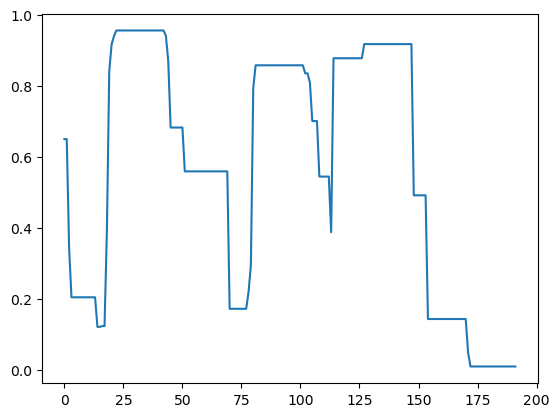

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0.0
score vfp predicted: 0.0162

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
42           42                1        0.0441        0.9559
43           43                1        0.0590        0.9410
41           41                1        0.0604        0.9396
147         147                1        0.0825        0.9175
40           40                1        0.0833        0.9167
index of true 74
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


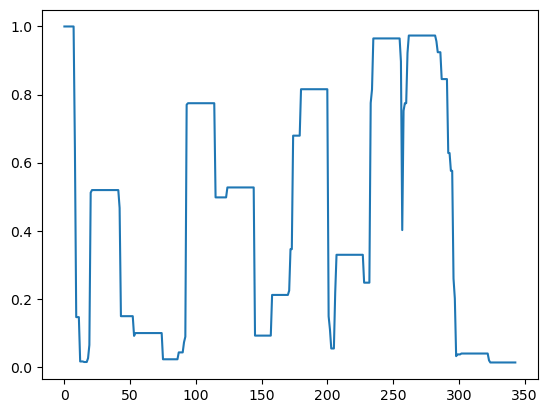

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 1.0

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
0           0                1           0.0           1.0
2           2                1           0.0           1.0
3           3                1           0.0           1.0
4           4                1           0.0           1.0
5           5                1           0.0           1.0
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


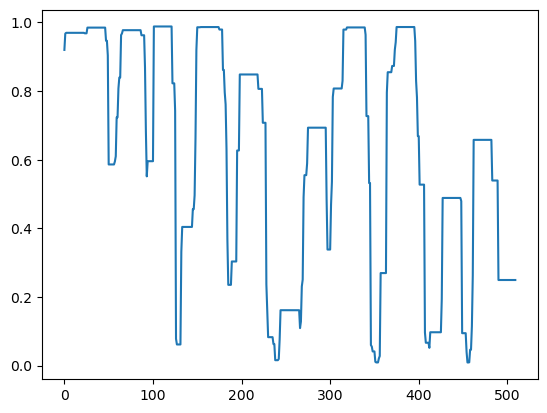

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.1495

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
121         121                1        0.0117        0.9883
395         395                1        0.0133        0.9867
174         174                1        0.0134        0.9866
170         170                1        0.0140        0.9860
339         339                1        0.0145        0.9855
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVS

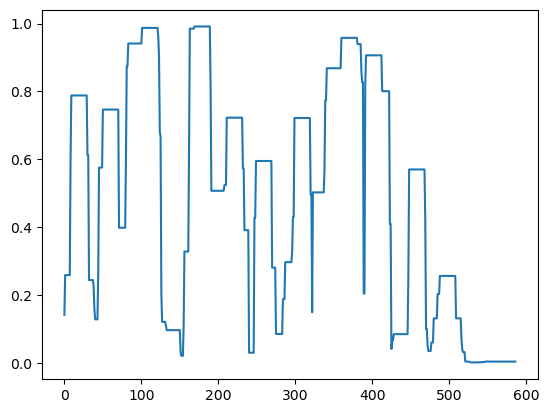

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 0.0
score vfp predicted: 0.101

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
189         189                1        0.0087        0.9913
121         121                1        0.0129        0.9871
183         183                1        0.0151        0.9849
188         188                1        0.0152        0.9848
122         122                1        0.0381        0.9619
index of true 130


In [37]:

# transformer pequeno ES2bT68M + LSTM

# seq representations
# model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # mau 
model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo
# model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo

# # contactrepresentations
# model_name_specific = 'dl/half_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # literalmente a seq toda ahah
# model_name_specific = 'dl/third_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # did not run CV scores
# model_name_specific = 'dl/all_Window21_gap1_TRANSFORMER_facebook_T68M_esm2_t6_8M_UR50D_contact_class_10groupedKFOLD_cluster80_bilstm1' # did not run CV scores

output(model_name_specific)


################################
192
Spike glycoprotein S
LAATSASLFPPWTAAAGVPFY
vfp model prediction


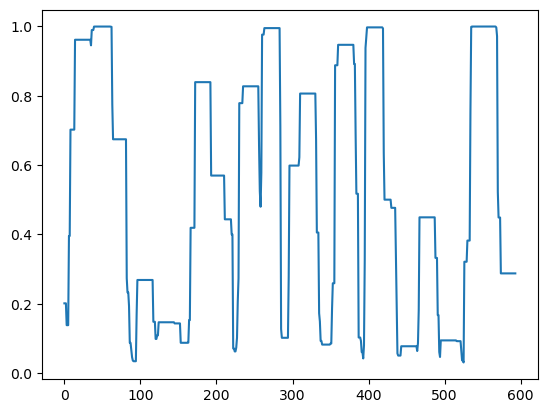

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'V', 'W', 'L', 'L', 'I', 'C', 'L', 'A', 'G', 'V', 'A', 'M', 'L', 'V', 'L', 'L', 'F', 'F', 'I']
signal []
vfp predicted: 0.0
score vfp predicted: 0.1702

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
565         565                1        0.0000        1.0000
567         567                1        0.0001        0.9999
566         566                1        0.0002        0.9998
60           60                1        0.0002        0.9998
556         556                1        0.0002        0.9998
index of true 204
################################
265
Envelope glycoprotein gp160 (Env polyprotein) 
AAGLGALFLGFLGDSREHMGA
vfp model prediction


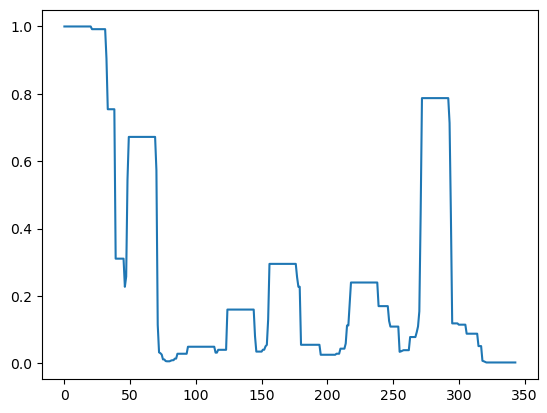

tmd prediction by DeepTMHMM


tmd ['I', 'K', 'I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I', 'G', 'L', 'R', 'I', 'V', 'F', 'A', 'V', 'L']
signal []
vfp predicted: 0.0
score vfp predicted: 0.1791

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
20          20                1        0.0003        0.9997
31          31                1        0.0083        0.9917
21          21                1        0.0136        0.9864
22          22                1        0.0675        0.9325
19          19                1        0.0705        0.9295
index of true 0
################################
105
Envelope glycoprotein
PISLTVALMLGGITVGGMARN
vfp model prediction


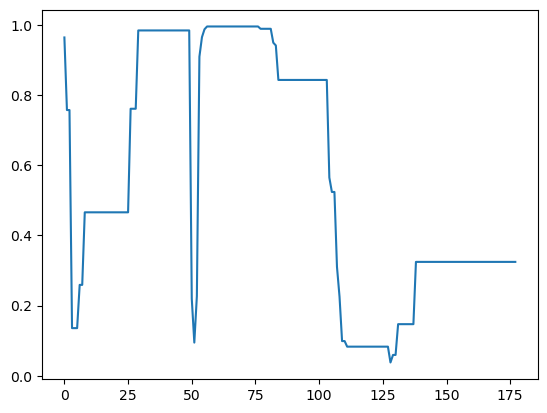

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'I', 'L', 'L', 'L', 'I', 'L', 'L', 'F']
signal ['D', 'P', 'I', 'S', 'L', 'T', 'V', 'A', 'L', 'M']
vfp predicted: 1.0
score vfp predicted: 0.7169

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
76          76                1        0.0043        0.9957
81          81                1        0.0109        0.9891
75          75                1        0.0123        0.9877
78          78                1        0.0146        0.9854
49          49                1        0.0156        0.9844
index of true 1
################################
618
fusion glycoprotein F0
FLGLILGLGAAVTAGVALAKT
vfp model prediction


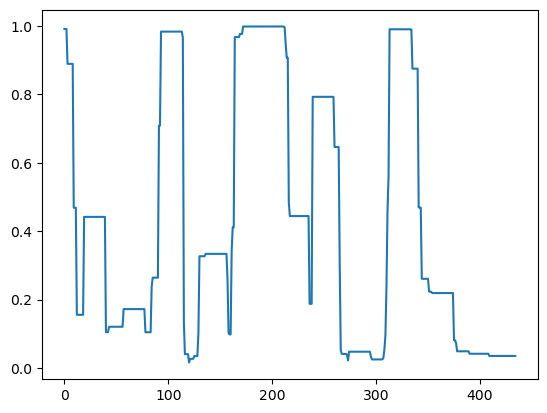

tmd prediction by DeepTMHMM


tmd ['L', 'L', 'F', 'V', 'V', 'M', 'L', 'I', 'I', 'I', 'M', 'A', 'V', 'I', 'G', 'F', 'I', 'L', 'Y']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9912

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
211         211                1        0.0017        0.9983
192         192                1        0.0018        0.9982
210         210                1        0.0023        0.9977
212         212                1        0.0042        0.9958
0             0                1        0.0088        0.9912
index of true 0
################################
574
Pre-glycoprotein polyprotein GP complex
GTFTWTLSDSSGVENPGGYCLTKWMILAAELKCFGNTAV
vfp model prediction


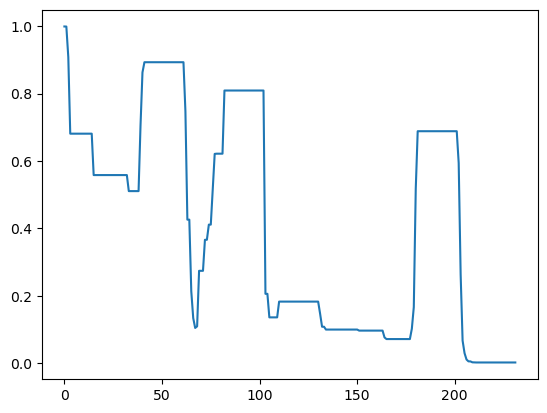

tmd prediction by DeepTMHMM


tmd ['L', 'M', 'D', 'L', 'L', 'M', 'F', 'S', 'T', 'S']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9992

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
0            0                1        0.0008        0.9992
1            1                1        0.0010        0.9990
2            2                1        0.0917        0.9083
61          61                1        0.1069        0.8931
60          60                1        0.1371        0.8629
index of true 0
################################
158
Genome polyprotein
MVGAATLCSALYVGDLCGALFLVGQGFSWRHR
vfp model prediction


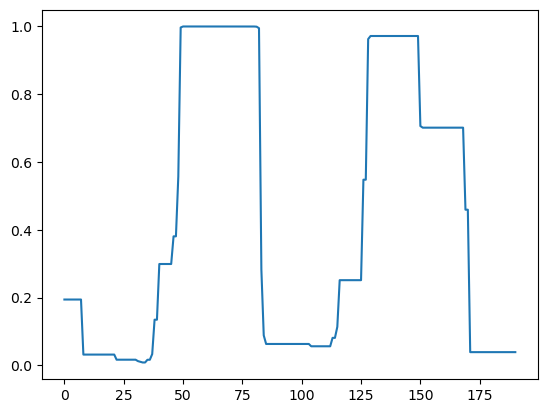

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'V', 'G', 'A', 'A', 'T', 'L', 'C', 'S', 'A', 'L', 'Y', 'V', 'G', 'D', 'L', 'G', 'A', 'L', 'F', 'L', 'V', 'G', 'Q', 'G', 'F', 'A', 'W', 'D', 'M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'M', 'T', 'L', 'I', 'V', 'M', 'F', 'D', 'L', 'V', 'I', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'V', 'A', 'Y', 'Y', 'S', 'M', 'A', 'K', 'V', 'F', 'L', 'V', 'L', 'C', 'L', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 1.0
score vfp predicted: 0.9998

 max score predicted

 top scores
    Unnamed: 0  class predicted  prob_class_0  prob_class_1
71          71                1        0.0001        0.9999
70          70                1        0.0001        0.9999
74          74                1        0.0001        0.9999
76          76                1        0.0001        0.9999
77          77                1        0.0001        0.9999
index of true 73
################################
146
Genome polyprotein
LVAPPTLCSALYVEDAFGAVSLVGQAFTFRPR
vfp model prediction


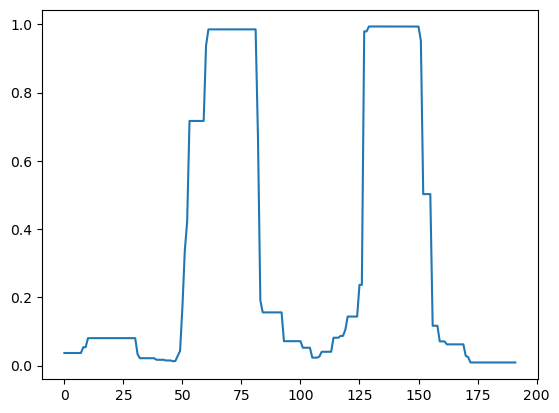

tmd prediction by DeepTMHMM


tmd ['M', 'M', 'M', 'N', 'W', 'S', 'P', 'A', 'I', 'G', 'L', 'V', 'I', 'T', 'F', 'F', 'D', 'L', 'V', 'V', 'G', 'A', 'H', 'W', 'G', 'V', 'M', 'A', 'G', 'L', 'A', 'Y', 'F', 'S', 'W', 'A', 'K', 'V', 'V', 'I', 'V', 'L', 'I', 'M', 'F', 'S', 'G', 'V', 'D']
signal []
vfp predicted: 0.0
score vfp predicted: 0.3481

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
149         149                1        0.0060        0.9940
150         150                1        0.0062        0.9938
81           81                1        0.0145        0.9855
147         147                1        0.0204        0.9796
151         151                1        0.0477        0.9523
index of true 74
################################
225
Envelope glycoprotein gp160 (Env polyprotein) 
AVGMGAVLFGFLGAAGSTMGA
vfp model prediction


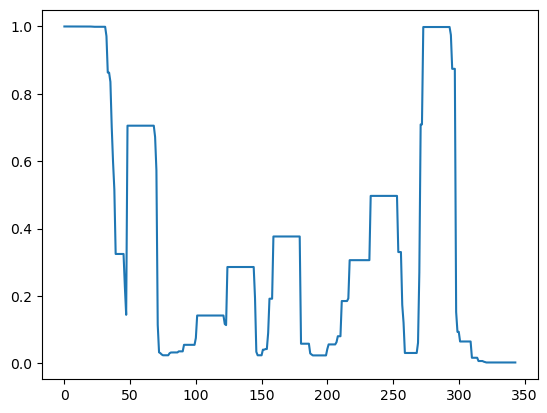

tmd prediction by DeepTMHMM


tmd ['I', 'F', 'I', 'M', 'I', 'V', 'G', 'G', 'L', 'I']
signal ['A', 'V', 'G', 'M', 'G', 'A', 'V', 'L', 'F', 'G']
vfp predicted: 1.0
score vfp predicted: 0.9998

 max score predicted

 top scores
   Unnamed: 0  class predicted  prob_class_0  prob_class_1
3           3                1        0.0001        0.9999
4           4                1        0.0001        0.9999
1           1                1        0.0001        0.9999
0           0                1        0.0002        0.9998
2           2                1        0.0002        0.9998
index of true 0
################################
779
G glycoprotein
[FRWYGPKY CGYATVT]
vfp model prediction


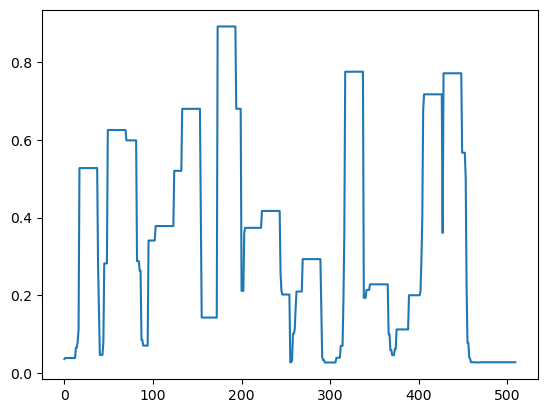

tmd prediction by DeepTMHMM


tmd ['F', 'F', 'F', 'I', 'I', 'G', 'L', 'I', 'I', 'G', 'L', 'F', 'L', 'V', 'L', 'R', 'V', 'G', 'I', 'Y', 'L']
signal ['M', 'K', 'C', 'L', 'L', 'Y', 'L', 'A', 'F', 'L', 'S', 'I', 'G', 'V', 'N', 'C']
vfp predicted: 0.0
score vfp predicted: 0.007

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
193         193                1        0.1084        0.8916
337         337                1        0.2248        0.7752
448         448                1        0.2288        0.7712
426         426                1        0.2829        0.7171
199         199                1        0.3200        0.6800
index of true 0
################################
804
Spike glycoprotein
SFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSN

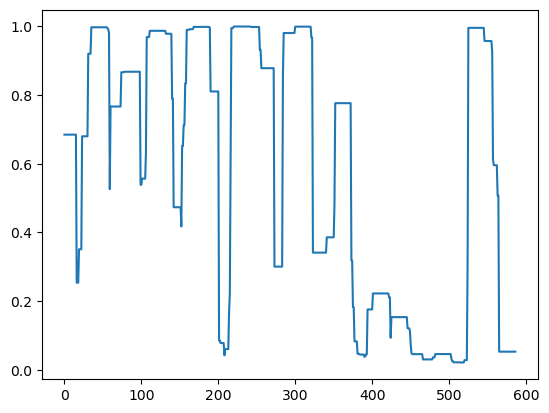

tmd prediction by DeepTMHMM


tmd ['W', 'Y', 'I', 'W', 'L', 'G', 'F', 'I', 'A', 'G', 'L', 'I', 'A', 'I', 'V', 'M', 'V', 'T', 'I', 'M', 'L']
signal []
vfp predicted: 1.0
score vfp predicted: 0.5252

 max score predicted

 top scores
     Unnamed: 0  class predicted  prob_class_0  prob_class_1
241         241                1        0.0002        0.9998
242         242                1        0.0005        0.9995
240         240                1        0.0006        0.9994
320         320                1        0.0007        0.9993
188         188                1        0.0014        0.9986
index of true 130


In [40]:

# transformer maior  ES2bT33 + LSTM    So experimentei uma. pode n ser a melhor

model_name_specific =  'dl/half_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo 
model_name_specific =  'dl/third_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo 
# model_name_specific =  'dl/all_Window21_gap1_TRANSFORMER_T33_facebook_esm2_t6_8M_UR50D_token_class_10groupedKFOLD_cluster80_bilstm1' # pessimo 
output(model_name_specific)
